In [ ]:
!pip install yfinance --quiet

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import time
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.size'] = 14
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (22,5)

from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, precision_score
from datetime import date



In [ ]:
data = yf.Ticker("GOOGL")
data_hist = data.history(period="max")
data_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2004-08-19 00:00:00-04:00,2.487584,2.588579,2.387085,2.496041,893181924,0.0,0.0
2004-08-20 00:00:00-04:00,2.512708,2.713456,2.500021,2.694301,456686856,0.0,0.0
2004-08-23 00:00:00-04:00,2.754999,2.822910,2.712710,2.721417,365122512,0.0,0.0
2004-08-24 00:00:00-04:00,2.767188,2.776144,2.576391,2.608729,304946748,0.0,0.0
2004-08-25 00:00:00-04:00,2.610968,2.686591,2.584103,2.636839,183772044,0.0,0.0
...,...,...,...,...,...,...,...
2025-06-17 00:00:00-04:00,175.699997,177.360001,174.580002,175.949997,24973000,0.0,0.0
2025-06-18 00:00:00-04:00,176.009995,176.559998,173.199997,173.320007,28707500,0.0,0.0
2025-06-20 00:00:00-04:00,173.949997,174.339996,165.460007,166.639999,75659900,0.0,0.0


In [ ]:
print(f'The data has {data_hist.shape[0]} rows and {data_hist.shape[1]} columns')

The data has 5245 rows and 7 columns


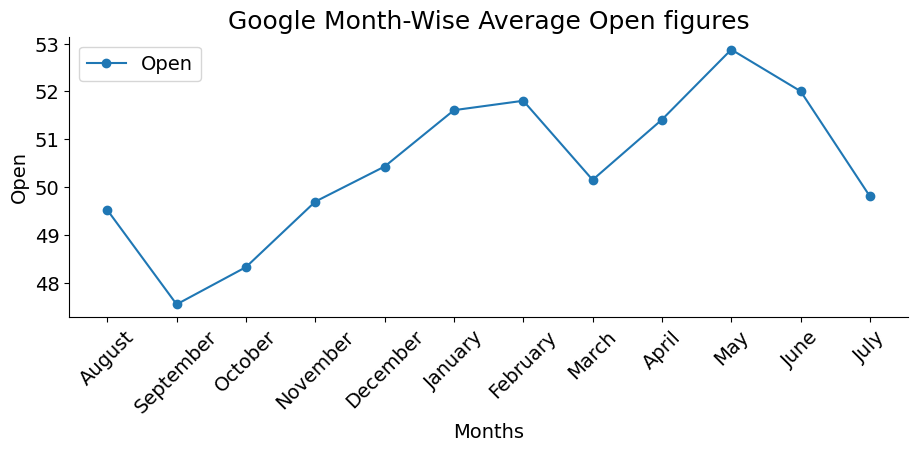

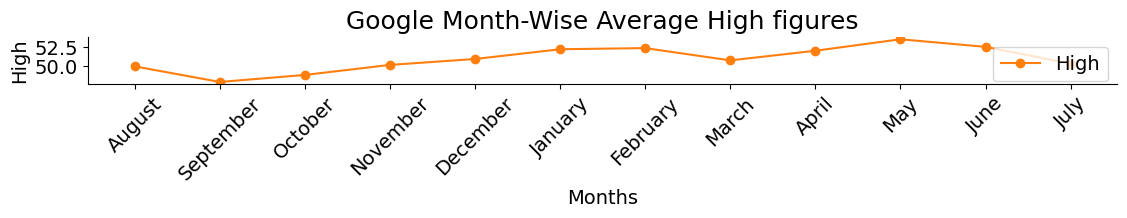

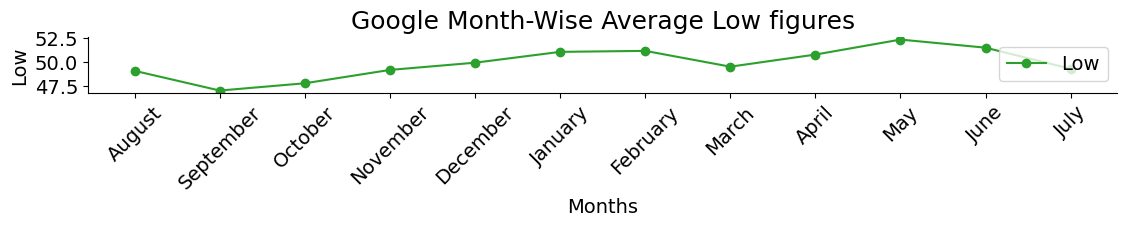

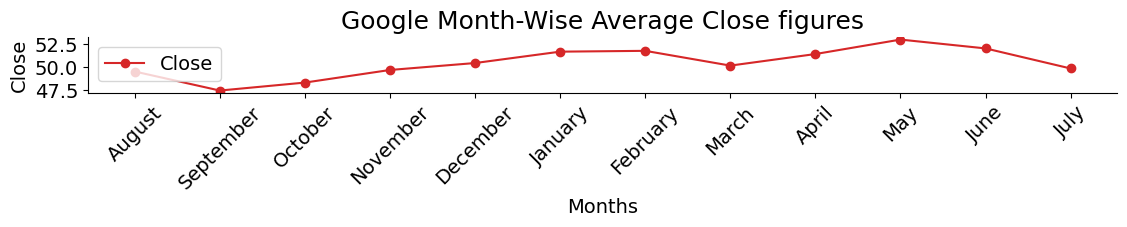

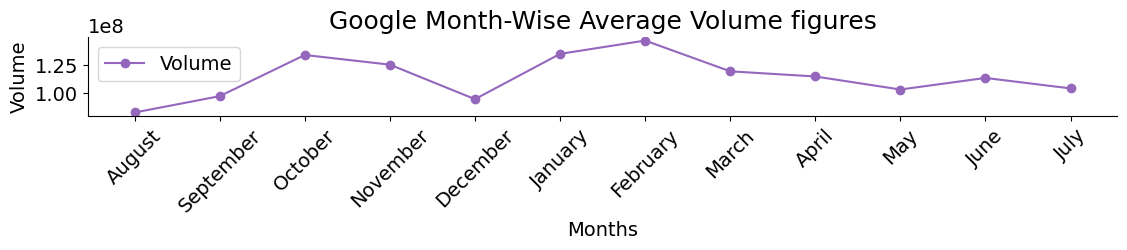

In [ ]:
colors = plt.rcParams["axes.prop_cycle"]()
a = 3
b=2
c=1
fig = plt.figure(figsize=(18,12))
for i in range(len(data_hist.groupby(data_hist.index.month_name(), sort=False).mean().columns[:-2])):
  color = next(colors)["color"]
  plt.subplot(a, b, c)
  plt.plot(data_hist.groupby(data_hist.index.month_name(), sort=False).mean().iloc[:, i], color= color, marker='o')

  plt.gca().spines['top'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)

  plt.xticks(rotation=45)
  plt.title(f"Google Month-Wise Average {data_hist.groupby(data_hist.index.month_name(), sort=False).mean().iloc[:, i].name} figures", fontsize=18)
  plt.xlabel('Months')
  plt.ylabel(data_hist.groupby(data_hist.index.month_name(), sort=False).mean().iloc[:, i].name)
  plt.legend([data_hist.groupby(data_hist.index.month_name(), sort=False).mean().iloc[:, i].name])
  c=c+1
  plt.tight_layout()
  plt.show()



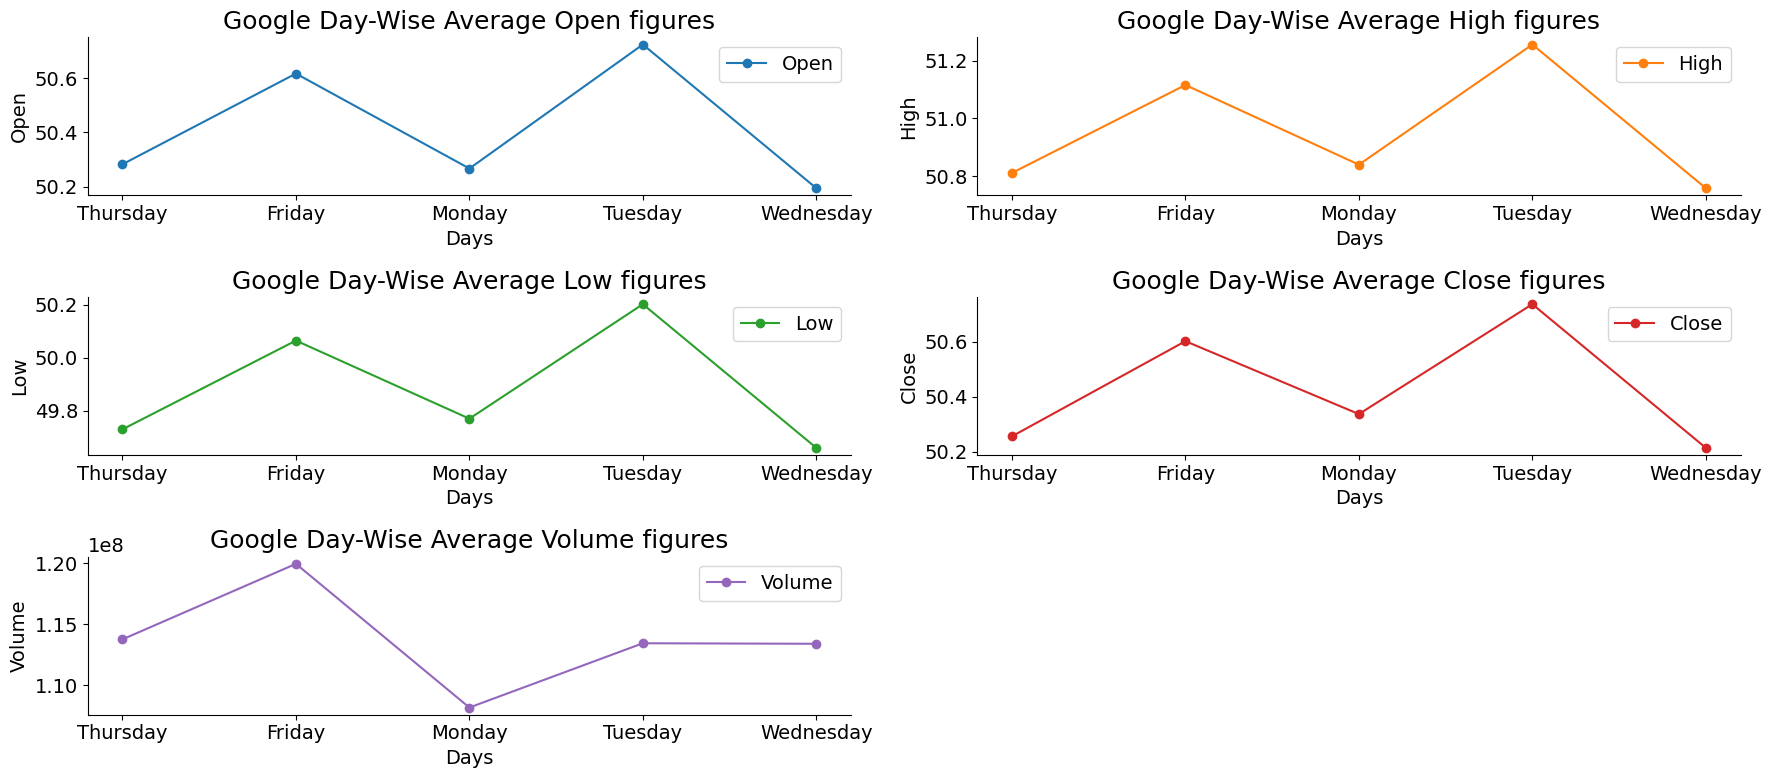

In [ ]:
a=3
b=2
c=1
colors = plt.rcParams["axes.prop_cycle"]()
fig = plt.figure(figsize=(18,8))

for i in range(len(data_hist.groupby(data_hist.index.day_name(), sort=False).mean().columns[:-2])):
    color = next(colors)["color"]
    plt.subplot(a, b, c)
    plt.plot(data_hist.groupby(data_hist.index.day_name(), sort=False).mean().iloc[:, i], color= color, marker='o')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xticks(rotation=0)
    plt.title(f"Google Day-Wise Average {data_hist.groupby(data_hist.index.day_name(), sort=False).mean().iloc[:, i].name} figures", fontsize=18)
    plt.xlabel('Days')
    plt.ylabel(data_hist.groupby(data_hist.index.day_name(), sort=False).mean().iloc[:, i].name)
    plt.legend([data_hist.groupby(data_hist.index.day_name(), sort=False).mean().iloc[:, i].name])
    c = c + 1

plt.tight_layout()
plt.show()

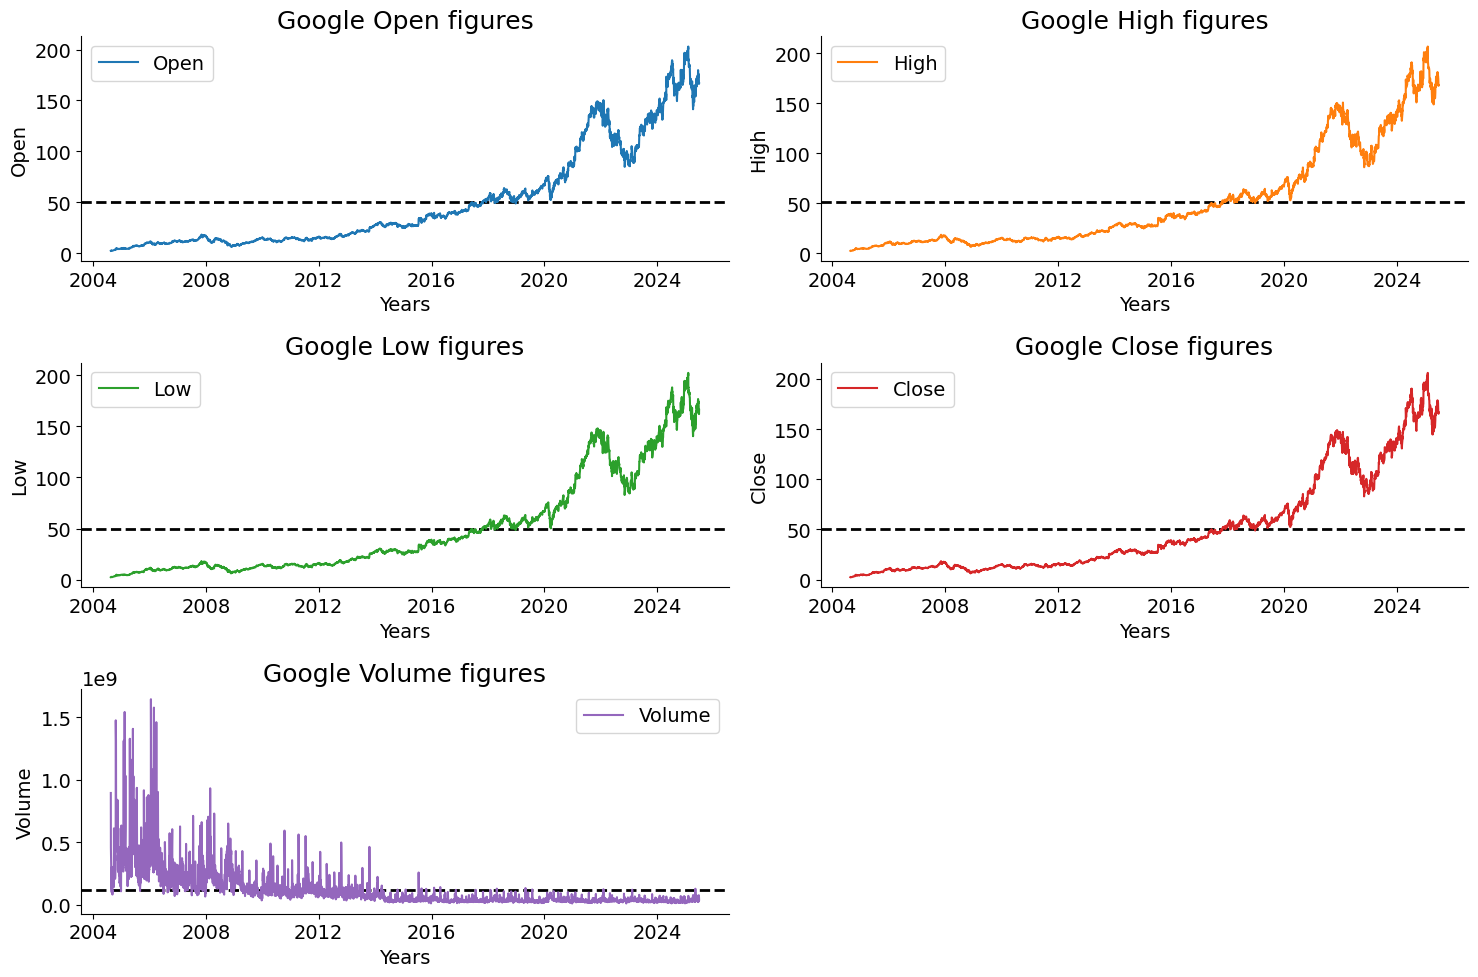

In [ ]:
a = 3
b = 2
c = 1

colors = plt.rcParams["axes.prop_cycle"]()

fig = plt.figure(figsize=(15,10))

for i in range(len(data_hist.columns[:-2])):
    color = next(colors)["color"]
    plt.subplot(a, b, c)

    plt.plot(data_hist[data_hist.columns[i]], color = color)

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.axhline(data_hist[data_hist.columns[i]].mean(), linestyle='--', lw=2, zorder=1, color='black')

    plt.title("Google "+data_hist.columns[i] + " figures", fontsize=18)
    plt.xlabel('Years')

    plt.ylabel(data_hist.columns[i])

    plt.legend([data_hist.columns[i]])

    c = c + 1


plt.tight_layout()


plt.show()

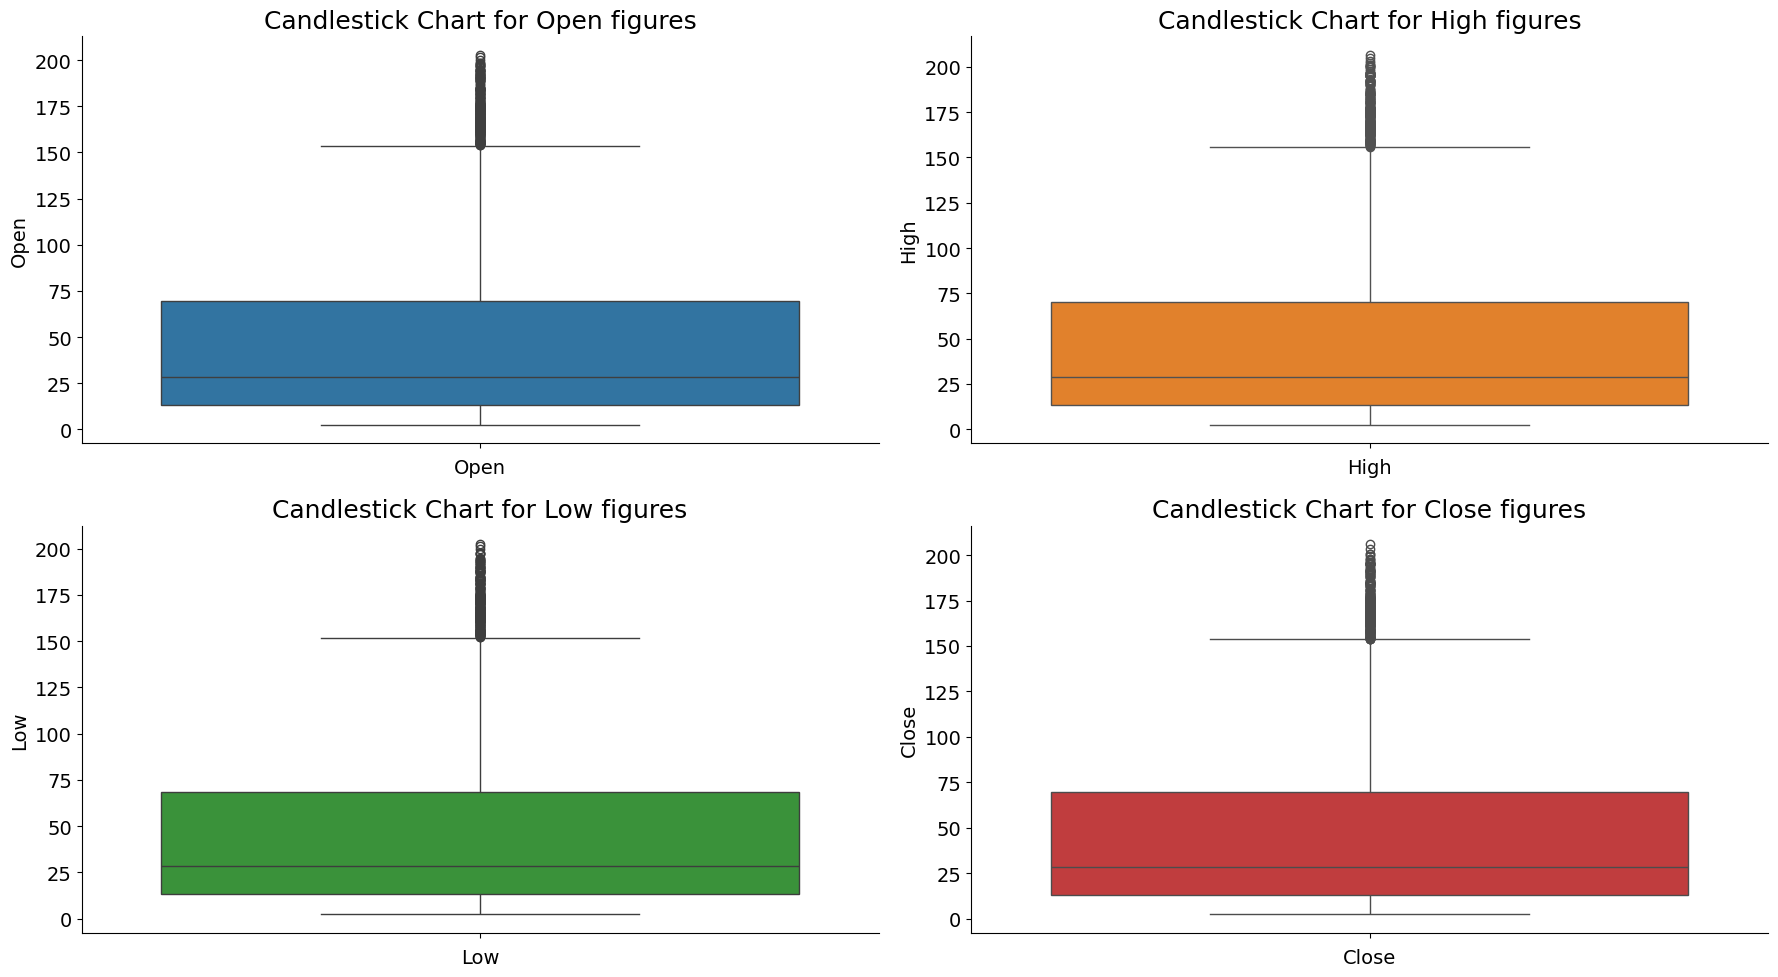

In [ ]:
colors = plt.rcParams["axes.prop_cycle"]()

a = 2
b = 2
c = 1


fig = plt.figure(figsize=(18,10))


for i in range(len(data_hist.columns[:-3])):
    color = next(colors)["color"]
    plt.subplot(a, b, c)

    sns.boxplot(data_hist[data_hist.columns[i]], color= color )

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xlabel(data_hist.columns[i])

    plt.title(f'Candlestick Chart for {data_hist.columns[i]} figures', fontsize=18)
    c = c + 1

plt.tight_layout()

plt.show()


In [ ]:
def candlestick(t, o, h, l, c):



    plt.figure(figsize=(22,5))

    color = ["green" if close_price > open_price else "red" for close_price, open_price in zip(c, o)]

    plt.bar(x=t, height=np.abs(o-c), bottom=np.min((o,c), axis=0), color=color, linewidth=0)

    plt.bar(x=t, height=h-l, bottom=l, color=color, linewidth=0)

    plt.grid(visible=False)

    plt.title('Candlestick Chart')

In [ ]:
today = date.today()
start = '2020-12-31'
end = today

In [ ]:
!pip install mplfinance


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.1 MB/s eta 0:00:00


In [ ]:
data_hist.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Close"].dropna()

,Close
Date,
2004-08-20 00:00:00-04:00,1.0
2004-08-23 00:00:00-04:00,1.0
2004-08-24 00:00:00-04:00,0.0
2004-08-25 00:00:00-04:00,1.0
2004-08-26 00:00:00-04:00,1.0
...,...
2025-06-17 00:00:00-04:00,0.0
2025-06-18 00:00:00-04:00,0.0
2025-06-20 00:00:00-04:00,0.0


In [ ]:
data_hist["Target"] = data_hist["Close"].rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])

df = data_hist.shift(1)

df = df.dropna()

df.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Target
Date,,,,,,,,
2004-08-23 00:00:00-04:00,2.512708,2.713456,2.500021,2.694301,456686856.0,0.0,0.0,1.0
2004-08-24 00:00:00-04:00,2.754999,2.822910,2.712710,2.721417,365122512.0,0.0,0.0,1.0
2004-08-25 00:00:00-04:00,2.767188,2.776144,2.576391,2.608729,304946748.0,0.0,0.0,0.0
2004-08-26 00:00:00-04:00,2.610968,2.686591,2.584103,2.636839,183772044.0,0.0,0.0,1.0
2004-08-27 00:00:00-04:00,2.610719,2.685346,2.603505,2.684351,141897960.0,0.0,0.0,1.0


In [ ]:
predictors = ["Close", "Volume", "Open", "High", "Low"]

df = df[["Open", "High", "Low", "Close", "Volume",'Target']].iloc[2:]

df.head()

,Open,High,Low,Close,Volume,Target
Date,,,,,,
2004-08-25 00:00:00-04:00,2.767188,2.776144,2.576391,2.608729,304946748.0,0.0
2004-08-26 00:00:00-04:00,2.610968,2.686591,2.584103,2.636839,183772044.0,1.0
2004-08-27 00:00:00-04:00,2.610719,2.685346,2.603505,2.684351,141897960.0,1.0
2004-08-30 00:00:00-04:00,2.689078,2.702013,2.629127,2.640570,124235640.0,0.0
2004-08-31 00:00:00-04:00,2.618928,2.624152,2.537584,2.537584,103935960.0,0.0


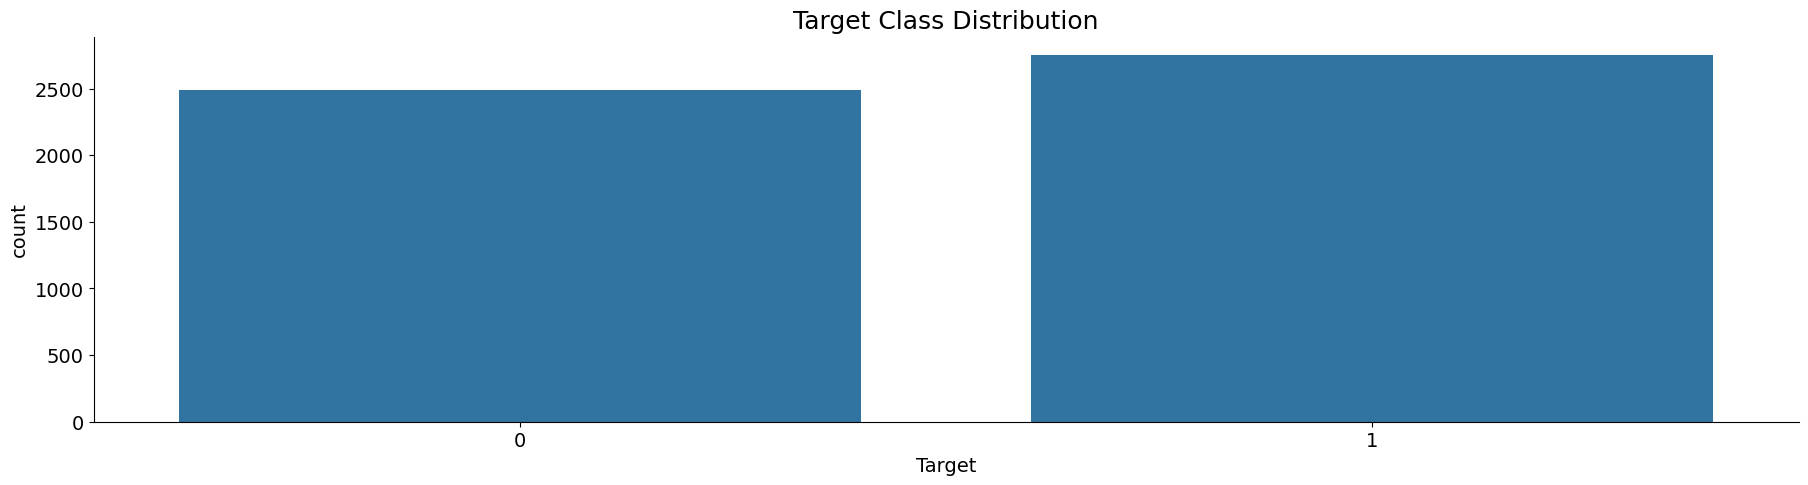

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df['Target'] = df['Target'].astype(int)

sns.countplot(x='Target', data=df)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('Target')
plt.title('Target Class Distribution', fontsize=18)

plt.show()


In [ ]:
ros = RandomOverSampler(random_state=0)

X = df[["Open", "High", "Low", "Close", "Volume"]]

y = df['Target'].values

X_resampled, y_resampled  = ros.fit_resample(X,y)

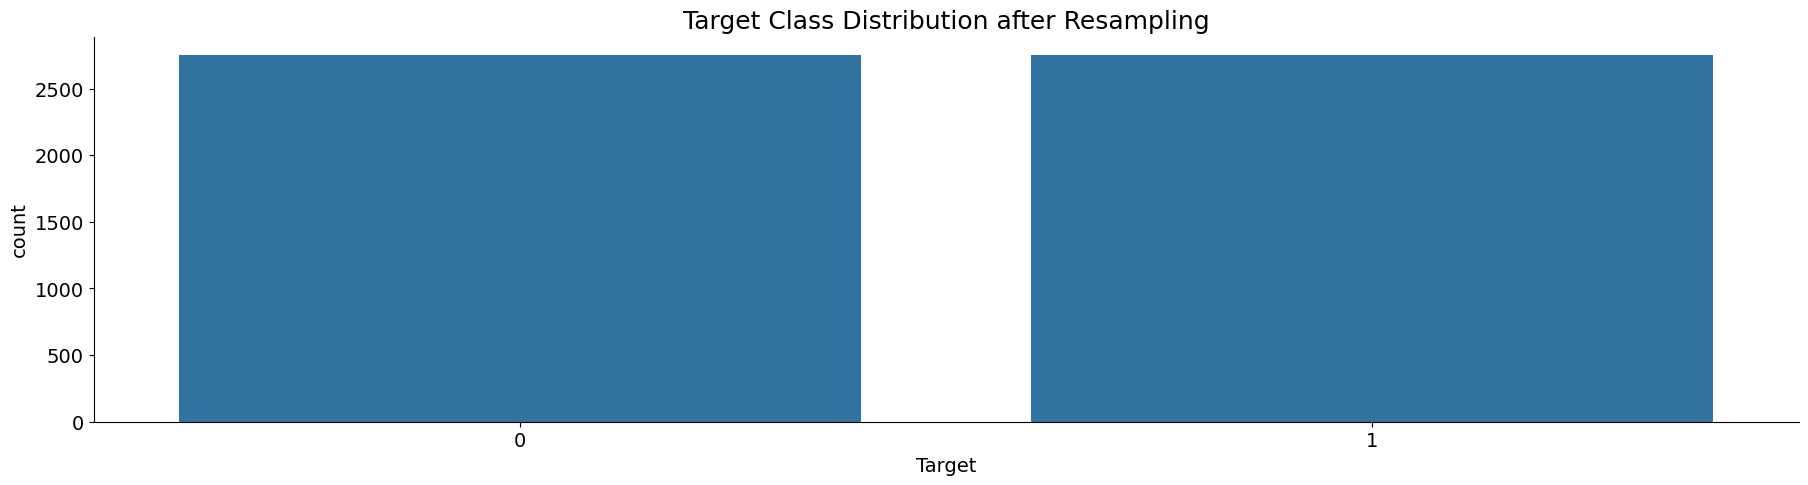

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

ros = RandomOverSampler(random_state=0)

X = df[["Open", "High", "Low", "Close", "Volume"]]
y = df['Target'].values

X_resampled, y_resampled = ros.fit_resample(X, y)

y_resampled = pd.Series(y_resampled).astype(int)

sns.countplot(x=y_resampled)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('Target')
plt.title('Target Class Distribution after Resampling', fontsize=18)
plt.show()


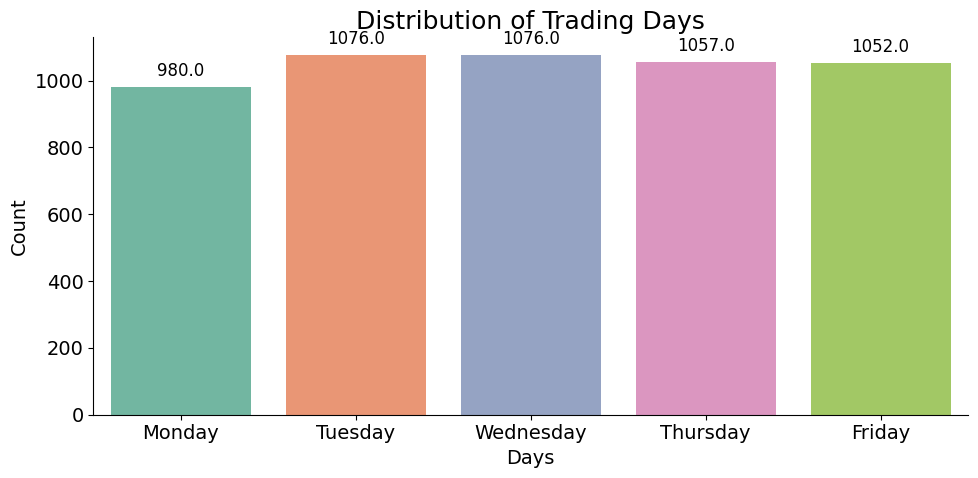

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
ax = sns.countplot(x=df.index.day_name(),
                   order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"],
                   palette="Set2")

sns.despine()

plt.xlabel('Days')
plt.ylabel('Count')
plt.title('Distribution of Trading Days', fontsize=18)

for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),
                textcoords='offset points',
                ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
threshold = int(len(X_resampled)*0.75)

In [ ]:
X_train, y_train = X_resampled.iloc[:threshold, :], y_resampled[:threshold]
X_test, y_test = X_resampled.iloc[threshold:, :], y_resampled[threshold:]

In [ ]:
X_train.head()

,Open,High,Low,Close,Volume
0,2.767188,2.776144,2.576391,2.608729,304946748.0
1,2.610968,2.686591,2.584103,2.636839,183772044.0
2,2.610719,2.685346,2.603505,2.684351,141897960.0
3,2.689078,2.702013,2.629127,2.640570,124235640.0
4,2.618928,2.624152,2.537584,2.537584,103935960.0


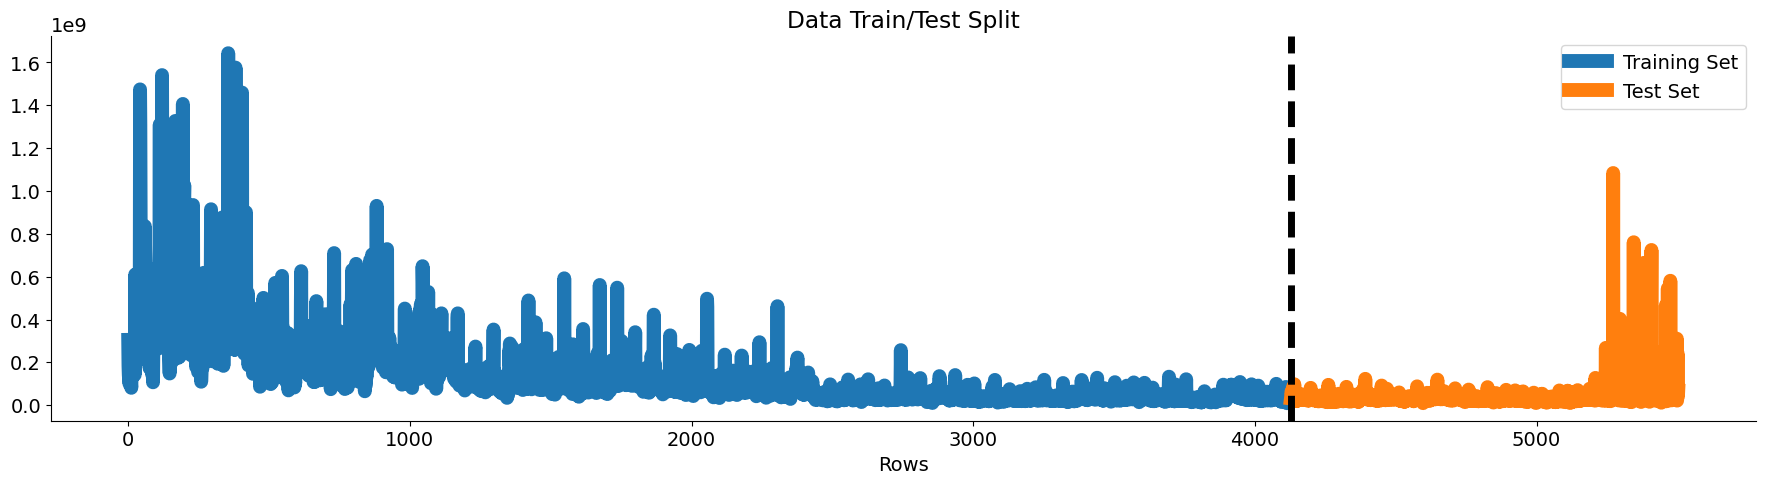

In [ ]:
fig, ax = plt.subplots()

X_train['Volume'].plot(ax=ax, label='Training Set', title='Data Train/Test Split', linewidth=10)

X_test['Volume'].plot(ax=ax, label='Test Set',  linewidth=10)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False);

ax.axvline(threshold, color='black', ls='--', lw=5)

ax.legend(['Training Set', 'Test Set'])

ax.set_xlabel('Rows')
plt.show()

In [ ]:
print(f'X_train Shape {X_train.shape}, y_train Shape {y_train.shape}')
print(f'X_test shape {X_test.shape}, y_test shape {y_test.shape}')

X_train Shape (4128, 5), y_train Shape (4128,)
X_test shape (1376, 5), y_test shape (1376,)


In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': ['error', 'logloss']
}

evals = [(dtrain, 'train'), (dtest, 'test')]

model = xgb.train(params, dtrain, num_boost_round=1000, evals=evals,
                  early_stopping_rounds=10, verbose_eval=False)

predictions = model.predict(dtest)
predictions = [1 if p > 0.5 else 0 for p in predictions]


In [ ]:
y_test[:5]

,0
4128,0
4129,1
4130,1
4131,1
4132,1


In [ ]:
predictions[:5]

[1, 1, 0, 0, 1]

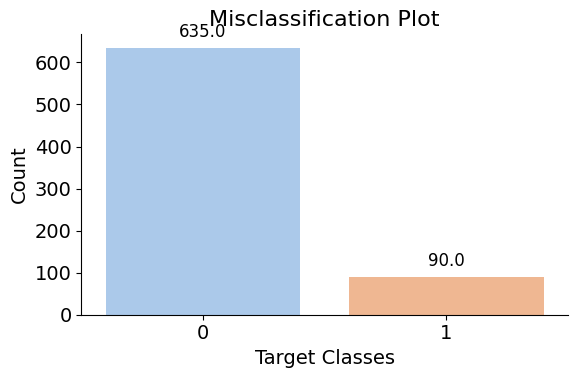

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

misclassified = pd.Series(y_test[y_test != predictions]).astype(int)

plt.figure(figsize=(6, 4))
ax = sns.countplot(x=misclassified, palette="pastel")

sns.despine()

plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Misclassification Plot', fontsize=16)

for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),
                textcoords='offset points',
                ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()



In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.62      0.19      0.29       783
           1       0.44      0.85      0.58       593

    accuracy                           0.47      1376
   macro avg       0.53      0.52      0.44      1376
weighted avg       0.54      0.47      0.42      1376



In [ ]:
params


{'max_depth': 3,
 'eta': 0.1,
 'objective': 'binary:logistic',
 'eval_metric': ['error', 'logloss']}

In [ ]:
model.attributes()


{'best_iteration': '7', 'best_score': '0.6987542208110871'}

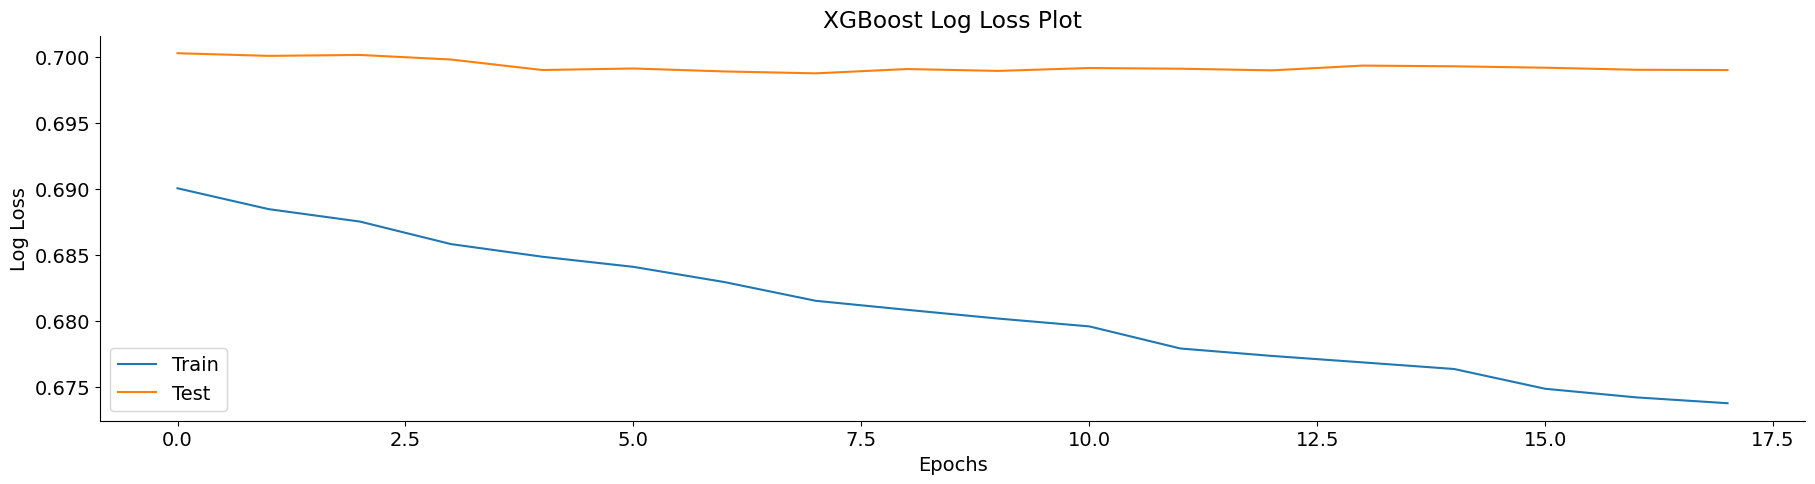

In [ ]:
import matplotlib.pyplot as plt

evals_result = {}

model = xgb.train(params, dtrain, num_boost_round=1000, evals=evals,
                  early_stopping_rounds=10, evals_result=evals_result, verbose_eval=False)

epochs = len(evals_result['train']['error'])
x_axis = range(epochs)

fig, ax = plt.subplots()
ax.plot(x_axis, evals_result['train']['logloss'], label='Train')
ax.plot(x_axis, evals_result['test']['logloss'], label='Test')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

ax.legend()
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss Plot')
plt.show()


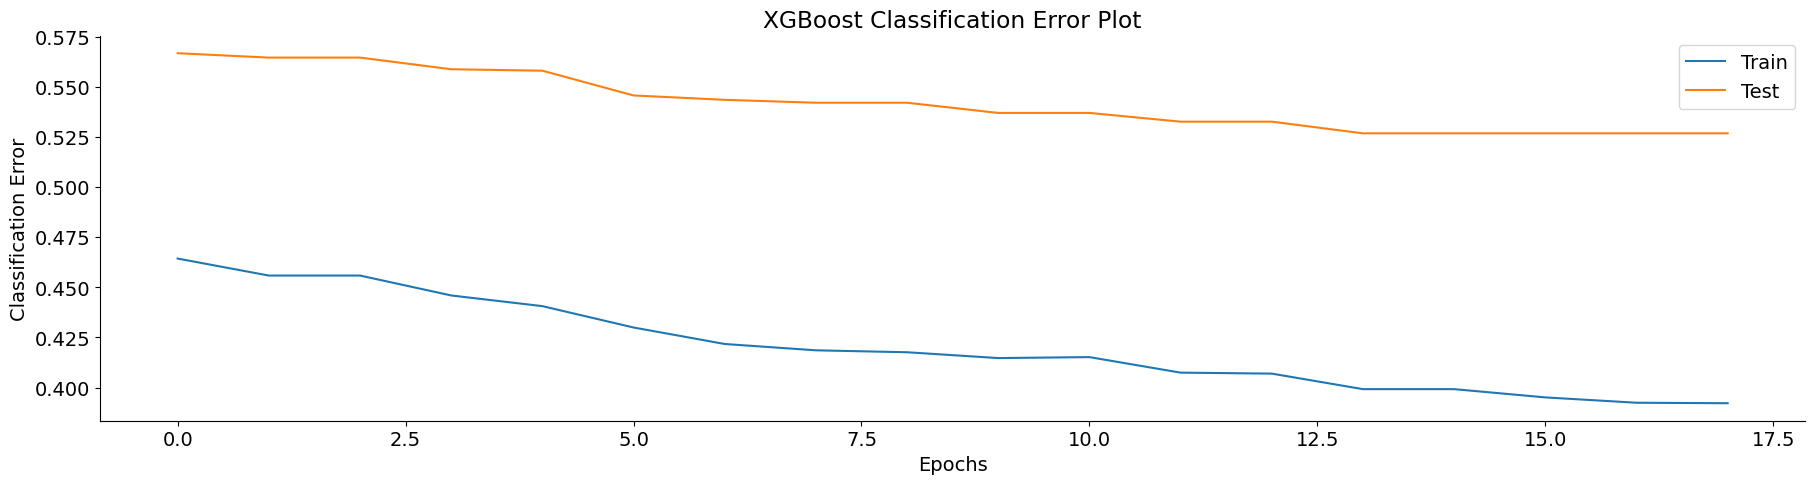

In [ ]:
epochs = len(evals_result['train']['error'])

x_axis = range(epochs)

fig, ax = plt.subplots()

ax.plot(x_axis, evals_result['train']['error'], label='Train')
ax.plot(x_axis, evals_result['test']['error'], label='Test')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

ax.legend()
plt.xlabel('Epochs')
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error Plot')
plt.show()


In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'max_depth': 7,
    'eta': 0.1,
    'lambda': 0.6,
    'objective': 'binary:logistic',
    'eval_metric': ['error', 'logloss']
}

evals_result = {}

model = xgb.train(params, dtrain, num_boost_round=1000, evals=[(dtrain, 'train'), (dtest, 'test')],
                  early_stopping_rounds=2, evals_result=evals_result, verbose_eval=False)

predictions_prob = model.predict(dtest)
predictions = [1 if p > 0.5 else 0 for p in predictions_prob]

print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       1.00      0.08      0.14       783
           1       0.45      1.00      0.62       593

    accuracy                           0.47      1376
   macro avg       0.73      0.54      0.38      1376
weighted avg       0.76      0.47      0.35      1376



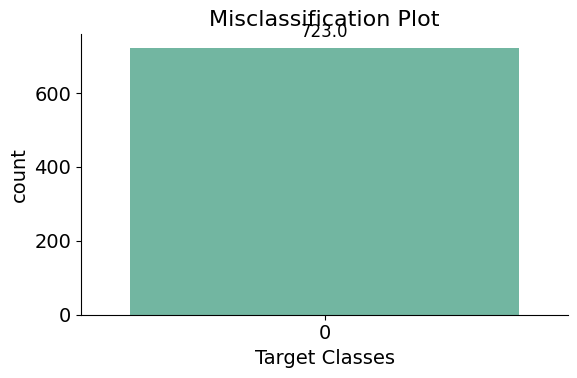

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

misclassified = pd.Series(y_test[y_test != predictions]).astype(int)

plt.figure(figsize=(6, 4))
ax = sns.countplot(x=misclassified, palette='Set2')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xlabel('Target Classes')
plt.title('Misclassification Plot', fontsize=16)

for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),
                textcoords='offset points',
                ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'max_depth': 15,
    'eta': 0.1,
    'lambda': 0.6,
    'objective': 'binary:logistic',
    'eval_metric': 'error'
}

evals_result = {}

model = xgb.train(params, dtrain, num_boost_round=1000,
                  evals=[(dtrain, 'train'), (dtest, 'test')],
                  early_stopping_rounds=2,
                  evals_result=evals_result,
                  verbose_eval=False)

predictions_prob = model.predict(dtest)
predictions = [1 if p > 0.5 else 0 for p in predictions_prob]

print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.66      0.32      0.43       783
           1       0.46      0.78      0.58       593

    accuracy                           0.52      1376
   macro avg       0.56      0.55      0.51      1376
weighted avg       0.57      0.52      0.50      1376



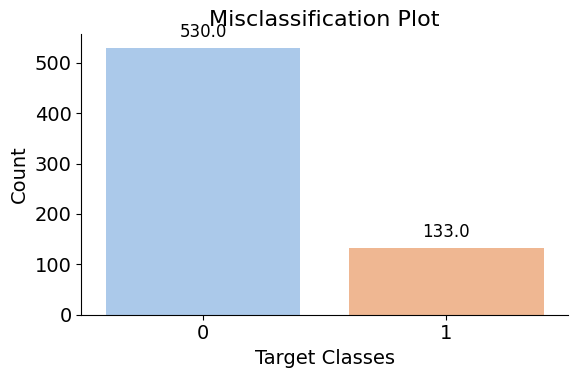

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

misclassified = pd.Series(y_test[y_test != predictions]).astype(int)

plt.figure(figsize=(6, 4))
ax = sns.countplot(x=misclassified, palette="pastel")

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Misclassification Plot', fontsize=16)

for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5), textcoords='offset points',
                ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
param_grid = { 'max_depth' : [18, 21, 25],
             'reg_lambda': [0.1, 0.4, 0.8]
             }

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_grid = {
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.1],
    'reg_lambda': [0.1, 0.6]
}

clf = GridSearchCV(model, param_grid=param_grid, cv=3)
clf.fit(X_resampled, y_resampled)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...ax_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [5, 10, 15],
                         'reg_lambda': [0.1, 0.6]})

In [ ]:
print(f'The best parameters are {clf.best_params_}')

The best parameters are {'learning_rate': 0.1, 'max_depth': 15, 'reg_lambda': 0.1}


In [ ]:
print(f'The best model is {clf.best_estimator_}')

The best model is XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=15,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)


In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'max_depth': 25,
    'eta': 0.1,
    'lambda': 0.8,
    'objective': 'binary:logistic',
    'eval_metric': ['error', 'logloss']
}

evals_result = {}

model = xgb.train(params, dtrain, num_boost_round=1000,
                  evals=[(dtrain, 'train'), (dtest, 'test')],
                  early_stopping_rounds=10,
                  evals_result=evals_result,
                  verbose_eval=False)

predictions_prob = model.predict(dtest)
predictions = [1 if p > 0.5 else 0 for p in predictions_prob]

print(f'After hyperparameter tuning:')
print(f'  Learning rate (eta): {params["eta"]}')
print(f'  Max depth: {params["max_depth"]}')
print(f'  L2 regularization (lambda): {params["lambda"]}')
print()
print(classification_report(y_test, predictions))


After hyperparameter tuning:
  Learning rate (eta): 0.1
  Max depth: 25
  L2 regularization (lambda): 0.8

              precision    recall  f1-score   support

           0       0.68      0.37      0.48       783
           1       0.48      0.78      0.59       593

    accuracy                           0.54      1376
   macro avg       0.58      0.57      0.54      1376
weighted avg       0.60      0.54      0.53      1376



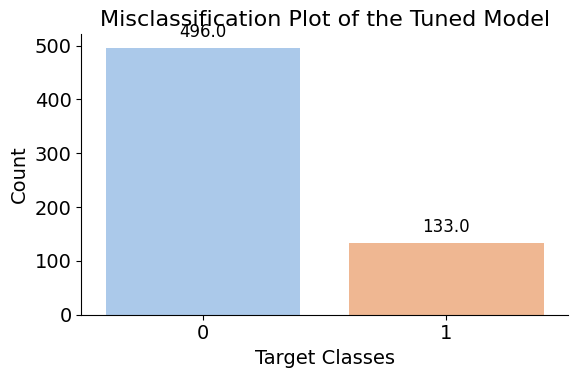

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

misclassified = pd.Series(y_test[y_test != predictions]).astype(int)

plt.figure(figsize=(6, 4))
ax = sns.countplot(x=misclassified, palette='pastel')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Misclassification Plot of the Tuned Model', fontsize=16)

for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height}',
                (bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom', size=12,
                xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()



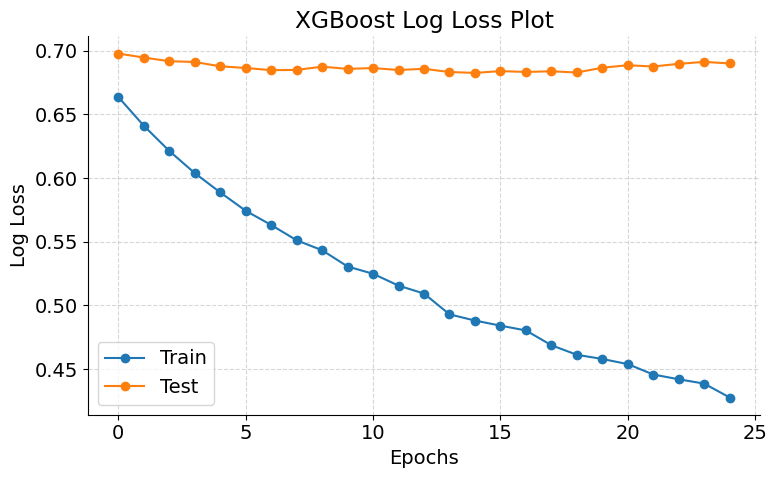

In [ ]:
import matplotlib.pyplot as plt

epochs = len(evals_result['train']['logloss'])

x_axis = range(0, epochs)

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(x_axis, evals_result['train']['logloss'], label='Train', marker='o')
ax.plot(x_axis, evals_result['test']['logloss'], label='Test', marker='o')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
ax.legend()
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss Plot')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


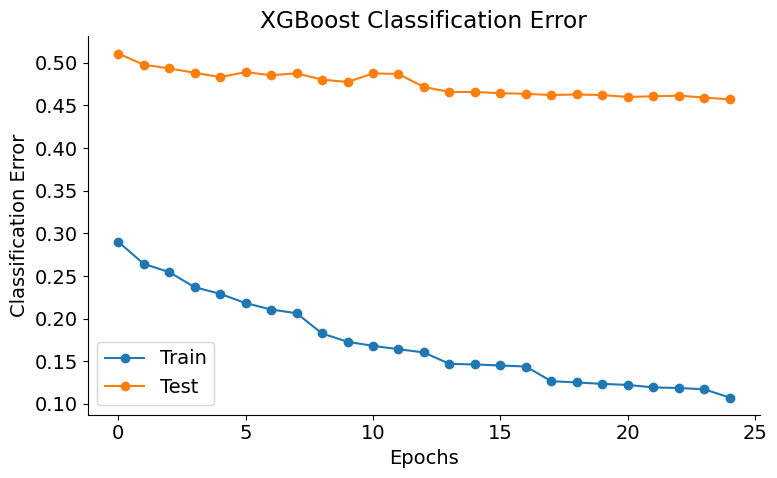

In [ ]:
import matplotlib.pyplot as plt

epochs = len(evals_result['train']['error'])

x_axis = range(0, epochs)

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(x_axis, evals_result['train']['error'], label='Train', marker='o')

ax.plot(x_axis, evals_result['test']['error'], label='Test', marker='o')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

ax.legend()

plt.xlabel('Epochs')
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')

plt.tight_layout()
plt.show()


In [ ]:
import xgboost as xgb
import pandas as pd

def backtest(data, params, predictors, start=1000, step=50, num_boost_round=100):
    predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:i+step].copy()

        dtrain = xgb.DMatrix(train[predictors], label=train["Target"])
        dtest = xgb.DMatrix(test[predictors])

        model = xgb.train(params, dtrain, num_boost_round=num_boost_round, verbose_eval=False)

        preds = model.predict(dtest)
        preds = pd.Series(preds, index=test.index)
        preds = preds.apply(lambda x: 1 if x > 0.6 else 0)

        combined = pd.concat({"Target": test["Target"], "Predictions": preds}, axis=1)
        predictions.append(combined)

    return pd.concat(predictions)


In [ ]:
params = {
    'max_depth': 7,
    'eta': 0.1,
    'lambda': 0.6,
    'objective': 'binary:logistic',
    'eval_metric': 'error'
}

start = time.time()
backtestpredictions = backtest(df, params, predictors)
end = time.time()

print(f'Time Elapsed in Backtesting: {round(end - start, 2)} seconds')




Time Elapsed in Backtesting: 11.8 seconds


In [ ]:
backtestpredictions

,Target,Predictions
Date,,
2008-08-14 00:00:00-04:00,0,1
2008-08-15 00:00:00-04:00,1,1
2008-08-18 00:00:00-04:00,1,1
2008-08-19 00:00:00-04:00,0,0
2008-08-20 00:00:00-04:00,0,1
...,...,...
2025-06-17 00:00:00-04:00,1,1
2025-06-18 00:00:00-04:00,0,1
2025-06-20 00:00:00-04:00,0,0


In [ ]:
print('Precision Score before adding predictors',
      round(precision_score(backtestpredictions['Target'], backtestpredictions['Predictions'])*100,2))

Precision Score before adding predictors 65.61


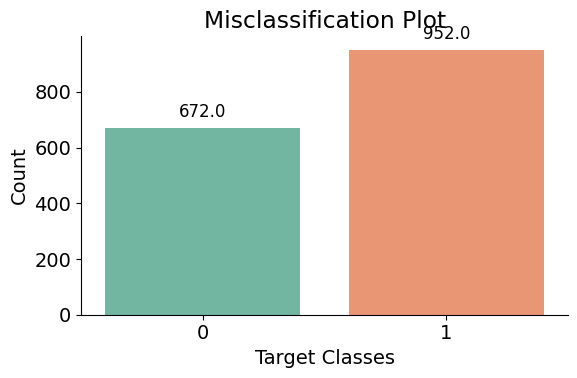

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

misclassified = backtestpredictions.loc[
    backtestpredictions['Target'] != backtestpredictions['Predictions'], 'Target'
].astype(int)

plt.figure(figsize=(6, 4))
ax = sns.countplot(x=misclassified, palette="Set2")

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Misclassification Plot')

for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),
                textcoords='offset points',
                ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
weekly_mean = df.rolling(7).mean()
quarterly_mean = df.rolling(90).mean()
annual_mean = df.rolling(365).mean()

weekly_trend = df.shift(1).rolling(7).mean()["Target"]

df["weekly_mean"] = weekly_mean["Close"] / df["Close"]
df["quarterly_mean"] = quarterly_mean["Close"] / df["Close"]
df["annual_mean"] = annual_mean["Close"] / df["Close"]

df["annual_weekly_mean"] = df["annual_mean"] / df["weekly_mean"]
df["annual_quarterly_mean"] = df["annual_mean"] / df["quarterly_mean"]
df["weekly_trend"] = weekly_trend

df["open_close_ratio"] = df["Open"] / df["Close"]
df["high_close_ratio"] = df["High"] / df["Close"]

df["low_close_ratio"] = df["Low"] / df["Close"]

In [ ]:
df.head()

,Open,High,Low,Close,Volume,Target,weekly_mean,quarterly_mean,annual_mean,annual_weekly_mean,annual_quarterly_mean,weekly_trend,open_close_ratio,high_close_ratio,low_close_ratio
Date,,,,,,,,,,,,,,,
2004-08-25 00:00:00-04:00,2.767188,2.776144,2.576391,2.608729,304946748.0,0,NaN,NaN,NaN,NaN,NaN,NaN,1.060742,1.064175,0.987604
2004-08-26 00:00:00-04:00,2.610968,2.686591,2.584103,2.636839,183772044.0,1,NaN,NaN,NaN,NaN,NaN,NaN,0.990189,1.018868,0.980000
2004-08-27 00:00:00-04:00,2.610719,2.685346,2.603505,2.684351,141897960.0,1,NaN,NaN,NaN,NaN,NaN,NaN,0.972570,1.000371,0.969882
2004-08-30 00:00:00-04:00,2.689078,2.702013,2.629127,2.640570,124235640.0,0,NaN,NaN,NaN,NaN,NaN,NaN,1.018370,1.023269,0.995667
2004-08-31 00:00:00-04:00,2.618928,2.624152,2.537584,2.537584,103935960.0,0,NaN,NaN,NaN,NaN,NaN,NaN,1.032056,1.034114,1.000000


In [ ]:
print(f'We now have {df.shape[1]} columns after adding more predictors')

We now have 15 columns after adding more predictors


In [ ]:
for i in range(len(df.columns)):
    if df[df.columns[i]].isnull().sum()>0:
        print(f'Column {i} {df.columns[i]} null values : {round(df[df.columns[i]].isnull().sum()/df.shape[0]*100,2)}%')

Column 6 weekly_mean null values : 0.11%
Column 7 quarterly_mean null values : 1.7%
Column 8 annual_mean null values : 6.95%
Column 9 annual_weekly_mean null values : 6.95%
Column 10 annual_quarterly_mean null values : 6.95%
Column 11 weekly_trend null values : 0.13%


In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0
Target,0
weekly_mean,0
quarterly_mean,0
annual_mean,0
annual_weekly_mean,0


In [ ]:
predictors  = ['Open', 'High','Low','Close','Volume','weekly_mean','quarterly_mean','annual_mean',
 'annual_weekly_mean','annual_quarterly_mean','weekly_trend','open_close_ratio','high_close_ratio','low_close_ratio']

In [ ]:
import time

params = {
    'max_depth': 7,
    'eta': 0.1,
    'lambda': 0.6,
    'objective': 'binary:logistic',
    'eval_metric': 'error'
}

start = time.time()
backtestpredictions = backtest(df, params, predictors)
end = time.time()

print(f'Time Elapsed in Backtesting: {round(end - start, 2)} seconds')


Time Elapsed in Backtesting: 42.36 seconds


In [ ]:
print('Precision Score after adding predictors',
       round(precision_score(backtestpredictions['Target'], backtestpredictions['Predictions'])*100,2))

Precision Score after adding predictors 85.41


In [ ]:
print(classification_report(backtestpredictions['Target'], backtestpredictions['Predictions']))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82      2007
           1       0.85      0.80      0.82      2234

    accuracy                           0.82      4241
   macro avg       0.82      0.82      0.82      4241
weighted avg       0.82      0.82      0.82      4241



In [ ]:
import statsmodels.tsa.stattools as ts
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import mean_squared_error

In [ ]:
for i in df.columns[:4]:
    result = ts.adfuller(df[i])

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if result[1] <= 0.05:
        print(i,'is stationary')
    else:
        print(i,'is not stationary')
    print('   ')

ADF Statistic: 0.617351
p-value: 0.988036
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Open is not stationary
   
ADF Statistic: 0.510411
p-value: 0.985186
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
High is not stationary
   
ADF Statistic: 0.433631
p-value: 0.982710
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Low is not stationary
   
ADF Statistic: 0.514478
p-value: 0.985307
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Close is not stationary
   


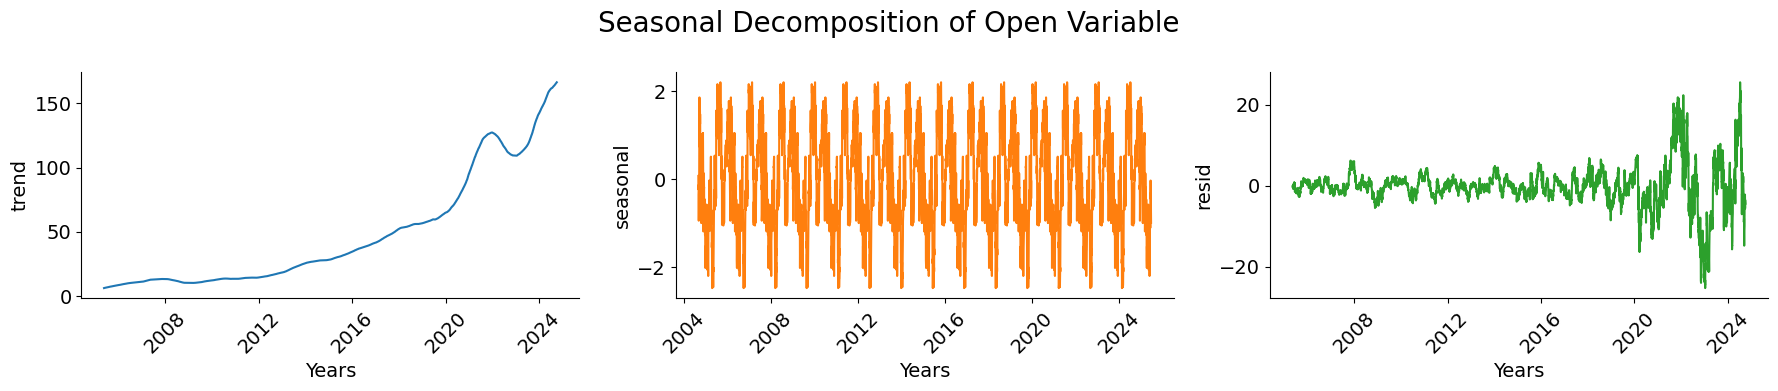

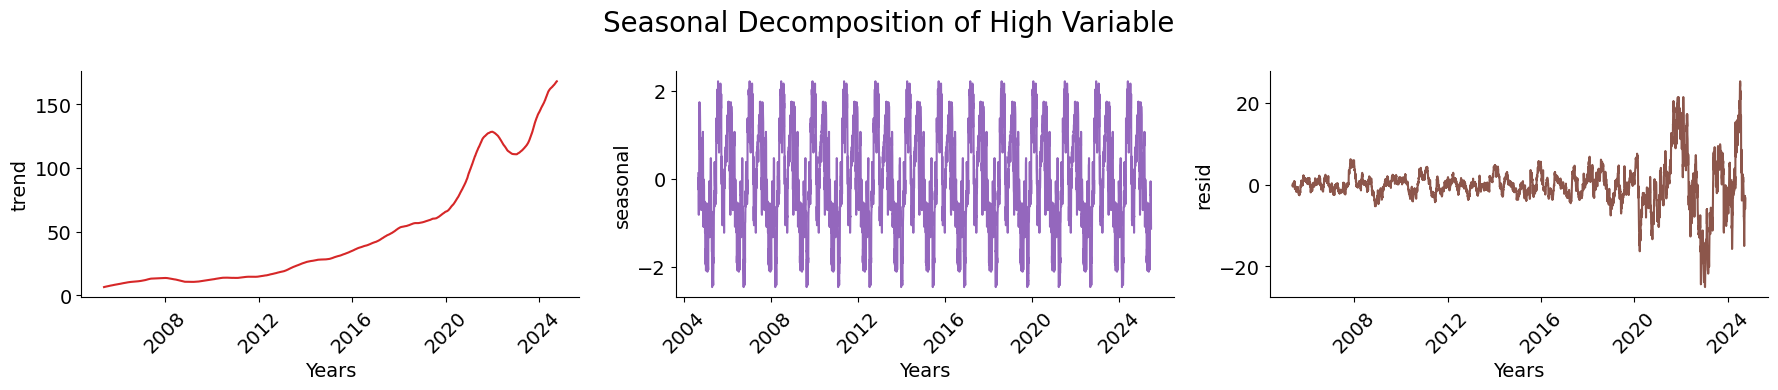

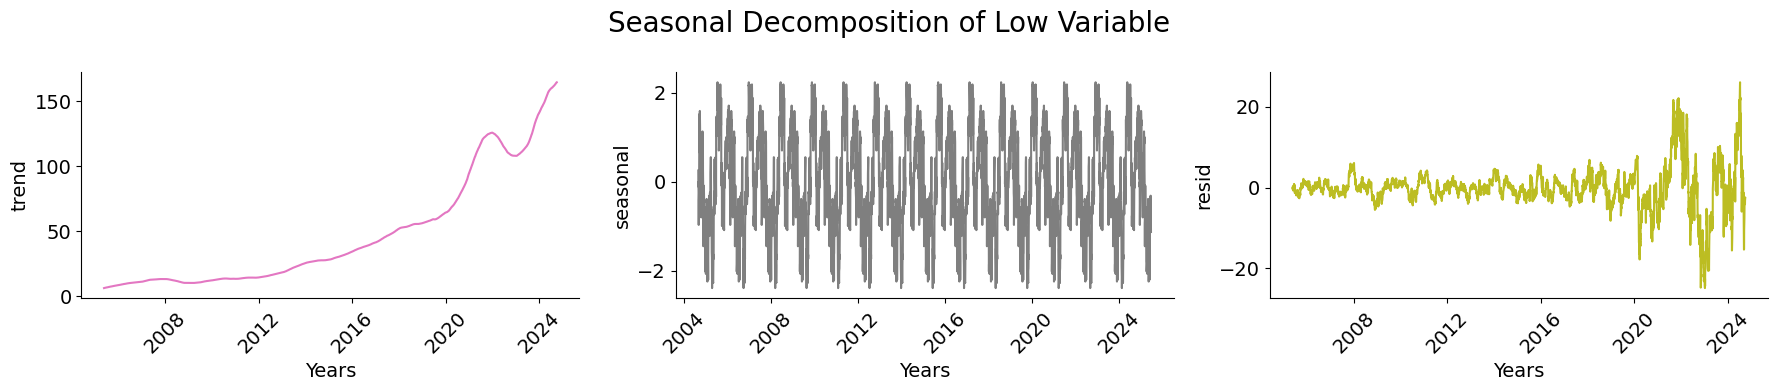

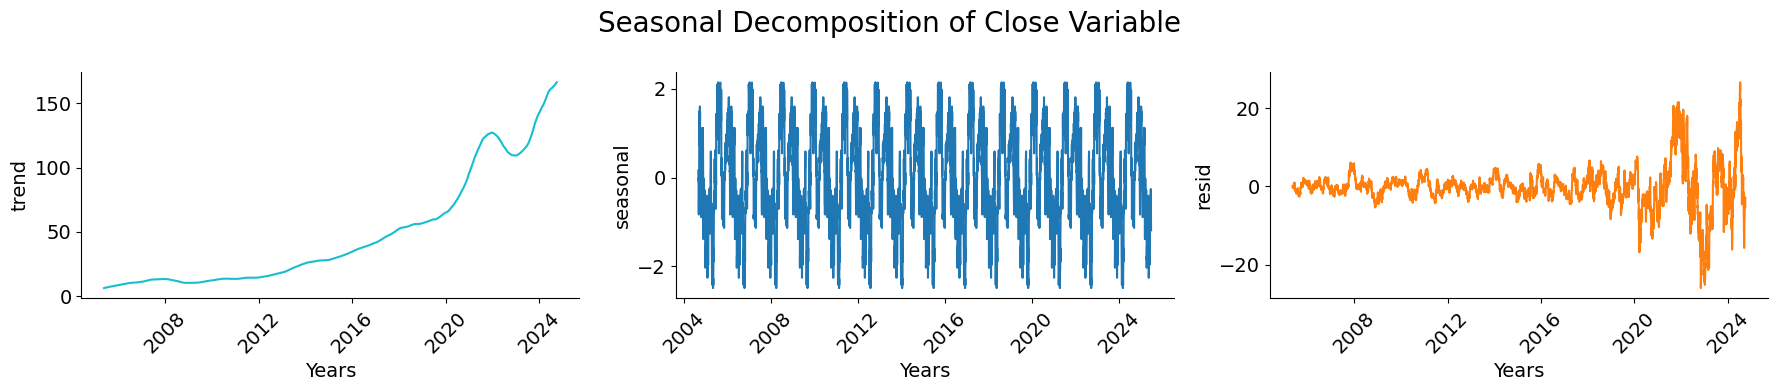

In [ ]:
colors = plt.rcParams["axes.prop_cycle"]()
for j in df.columns[:4]:
    results = seasonal_decompose(df[j], period=365)
    trend = results.trend
    seasonal = results.seasonal
    residual = results.resid
    properties = [trend, seasonal, residual]
    a = 1
    b = 3
    c = 1
    fig = plt.figure(figsize=(18,4))
    fig.suptitle(f'Seasonal Decomposition of {j} Variable', fontsize=20)
    for i in properties:
        color = next(colors)["color"]
        plt.subplot(a, b, c)
        plt.plot(i , color=color)
        plt.gca().spines['right'].set_visible(False)
        plt.gca().spines['top'].set_visible(False)
        plt.xlabel('Years')
        plt.ylabel(i.name)
        plt.xticks(rotation=45)
        c = c+1
    plt.tight_layout()
    plt.show()

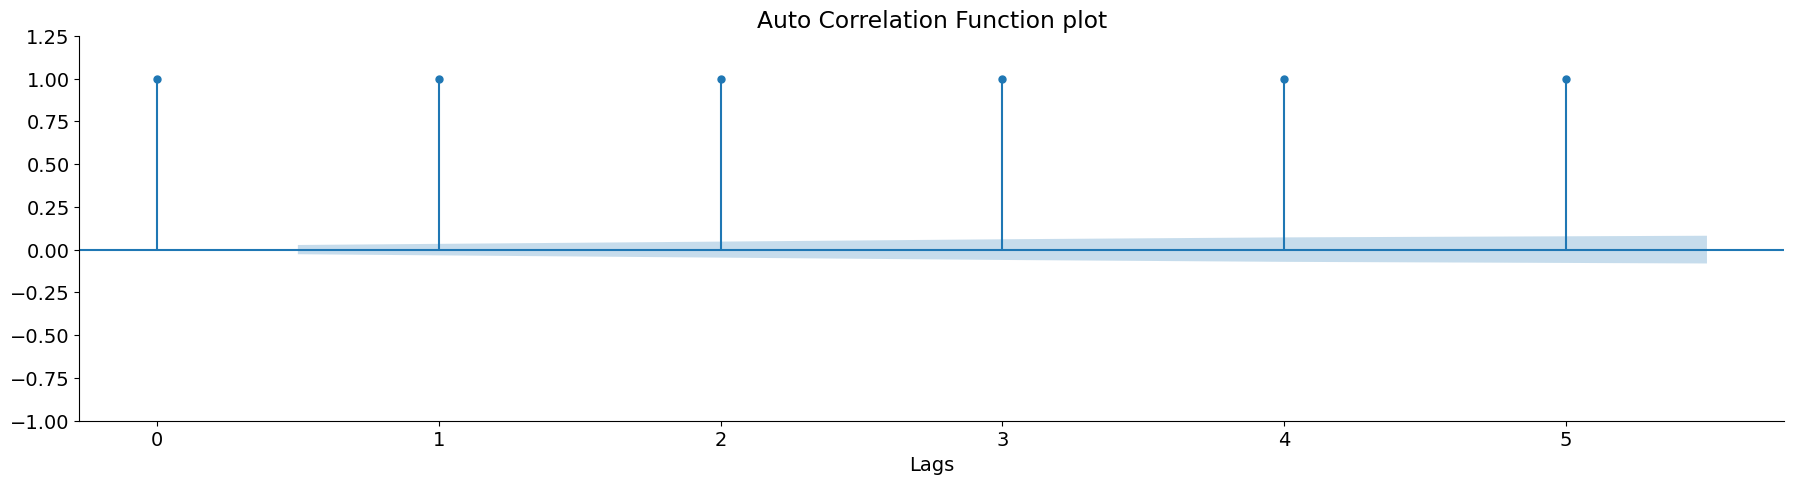

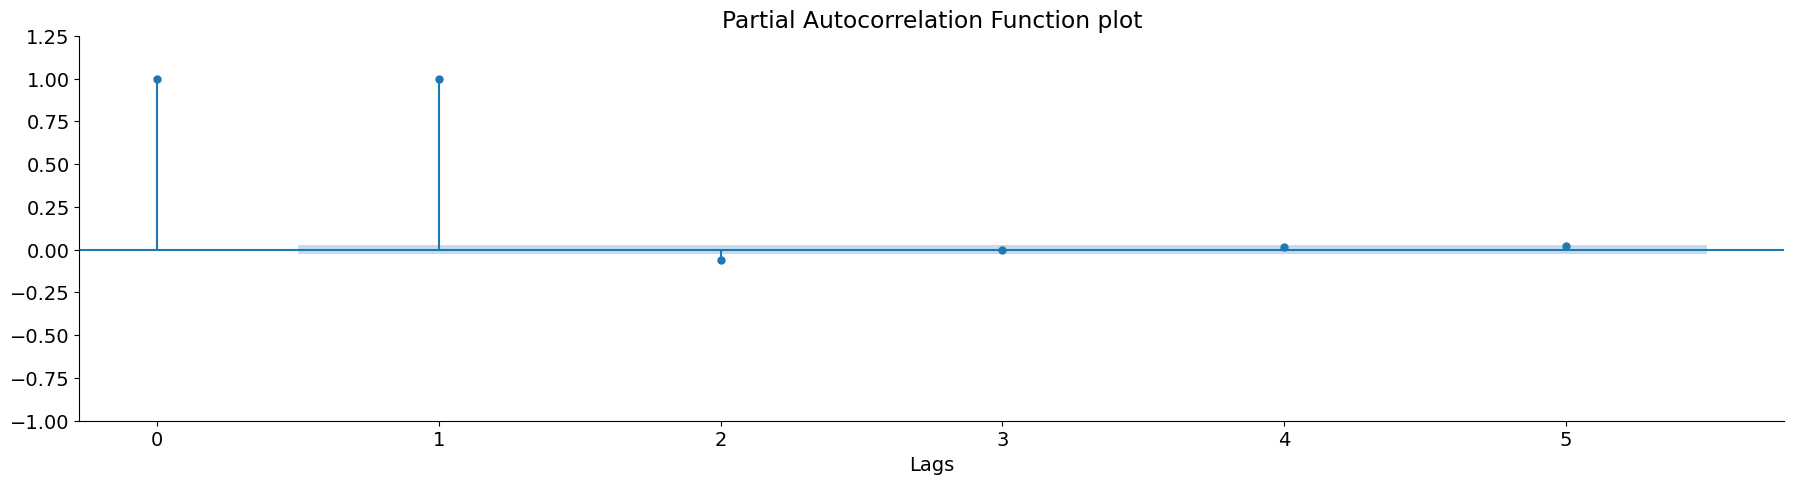

In [ ]:
plot_acf(df.High, lags=5, title='Auto Correlation Function plot')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel('Lags')
plt.ylim(top=1.25)
plt.show()

plot_pacf(df.High, lags=5, title='Partial Autocorrelation Function plot')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel('Lags')
plt.ylim(top=1.25)
plt.show()


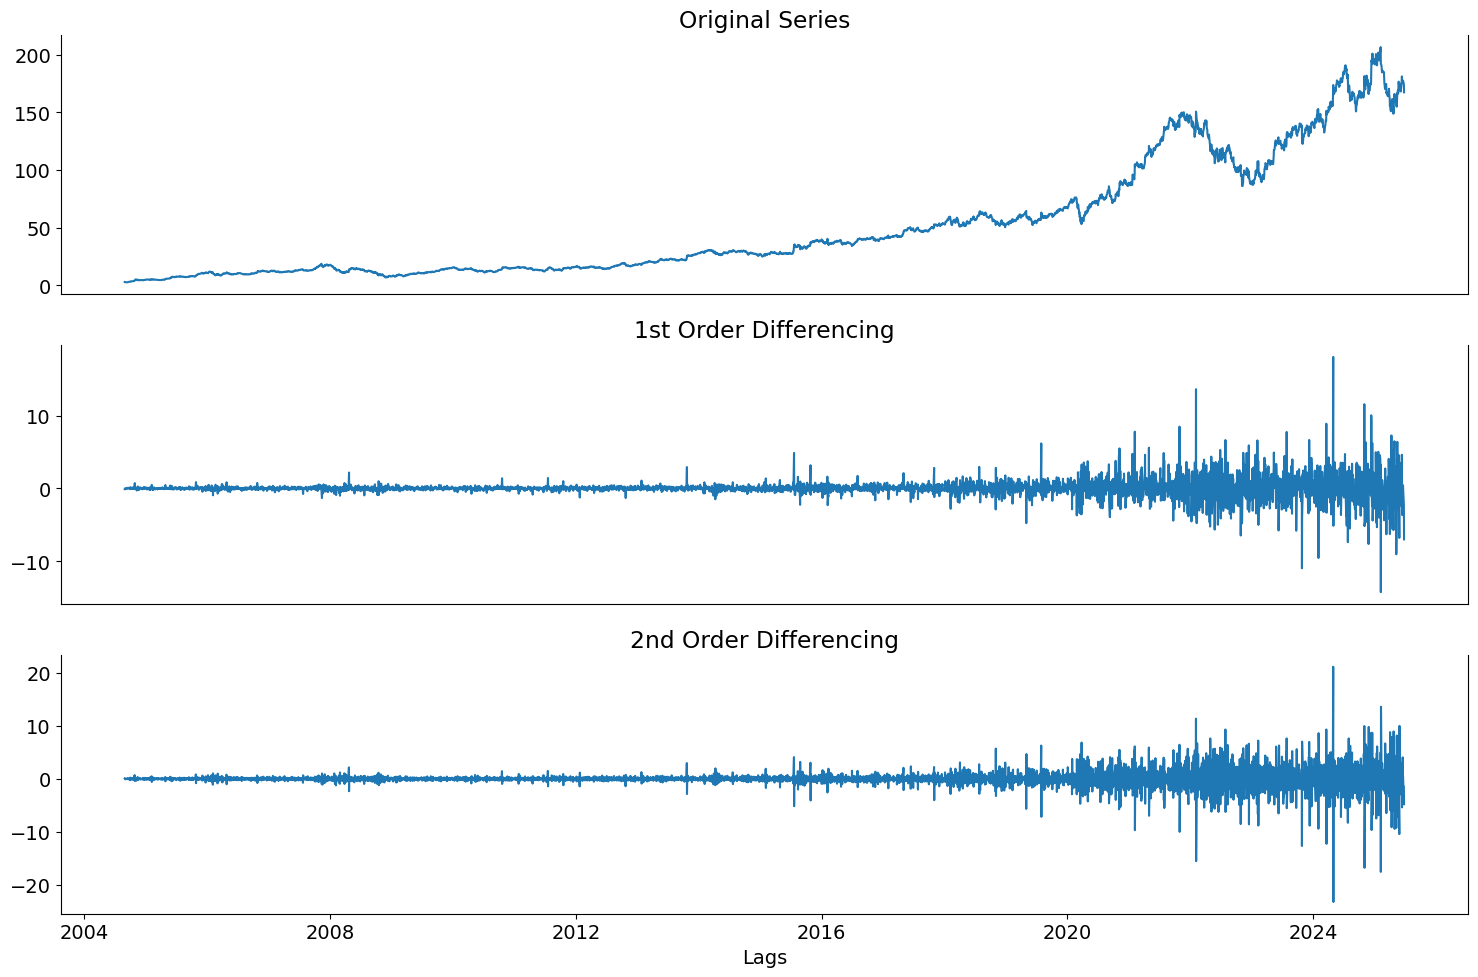

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15, 10))
ax1.plot(df.High); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
ax1.spines['top'].set_visible(False)

ax2.plot(df.High.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
ax2.spines['top'].set_visible(False)

ax3.plot(df.High.diff().diff()); ax3.set_title('2nd Order Differencing')
ax3.spines['top'].set_visible(False)

plt.xlabel('Lags')
plt.tight_layout()
plt.show()


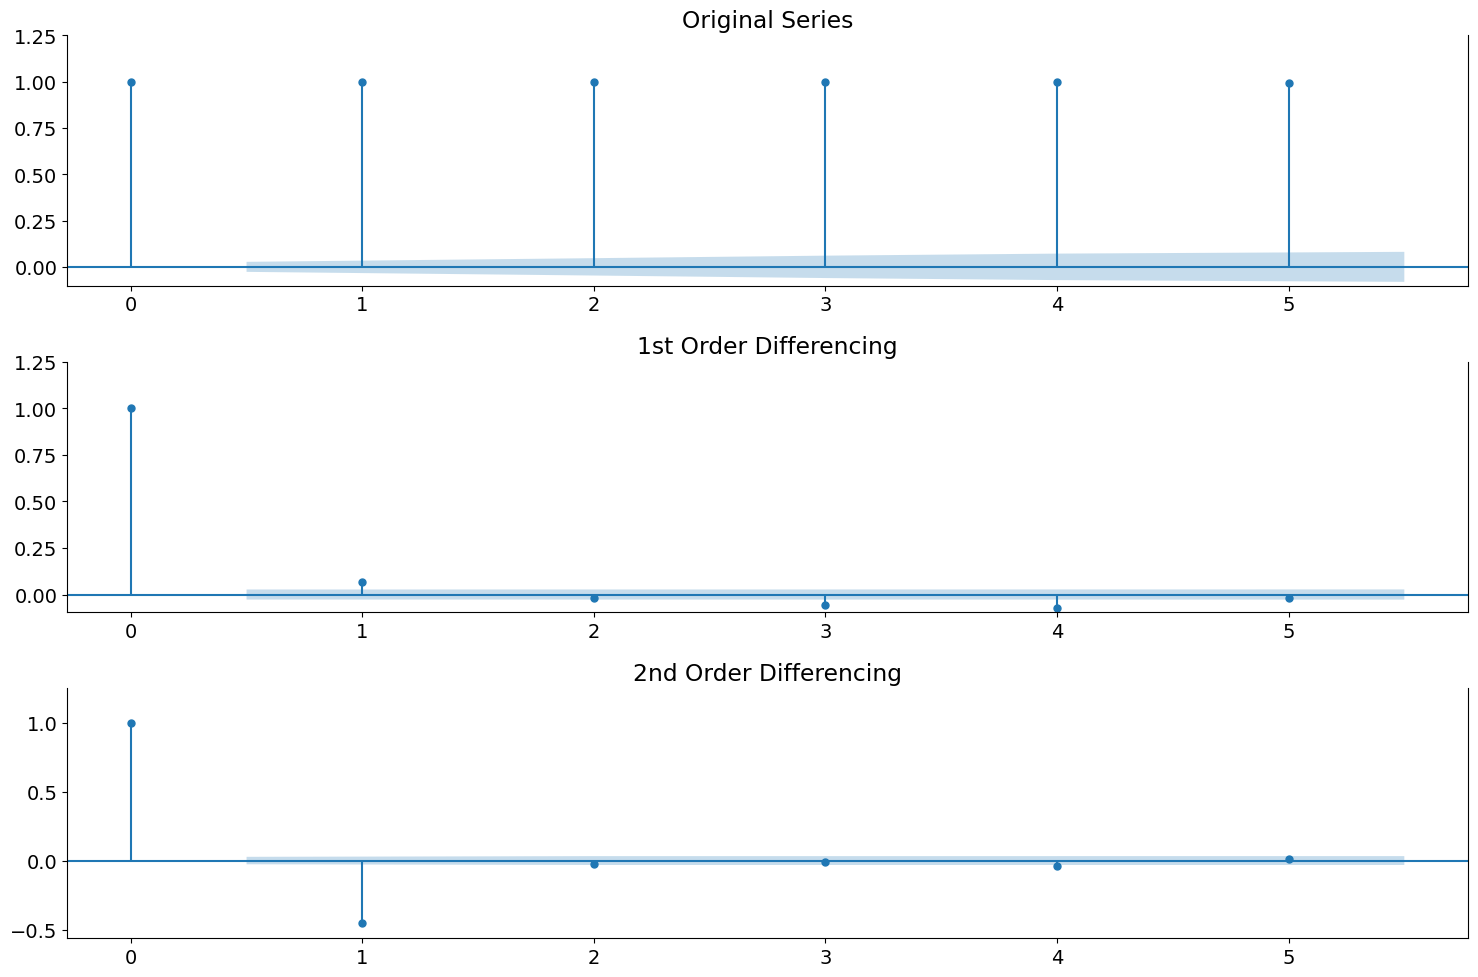

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15, 10))
plot_acf(df.High, ax=ax1, auto_ylims=True, lags = 5,title = 'Original Series')
ax1.spines['top'].set_visible(False)

plot_acf(df.High.diff().dropna(), auto_ylims=True, lags = 5, ax=ax2,title = '1st Order Differencing')
ax2.spines['top'].set_visible(False)

plot_acf(df.High.diff().diff().dropna(), auto_ylims=True, lags = 5, ax=ax3, title= '2nd Order Differencing')
ax3.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

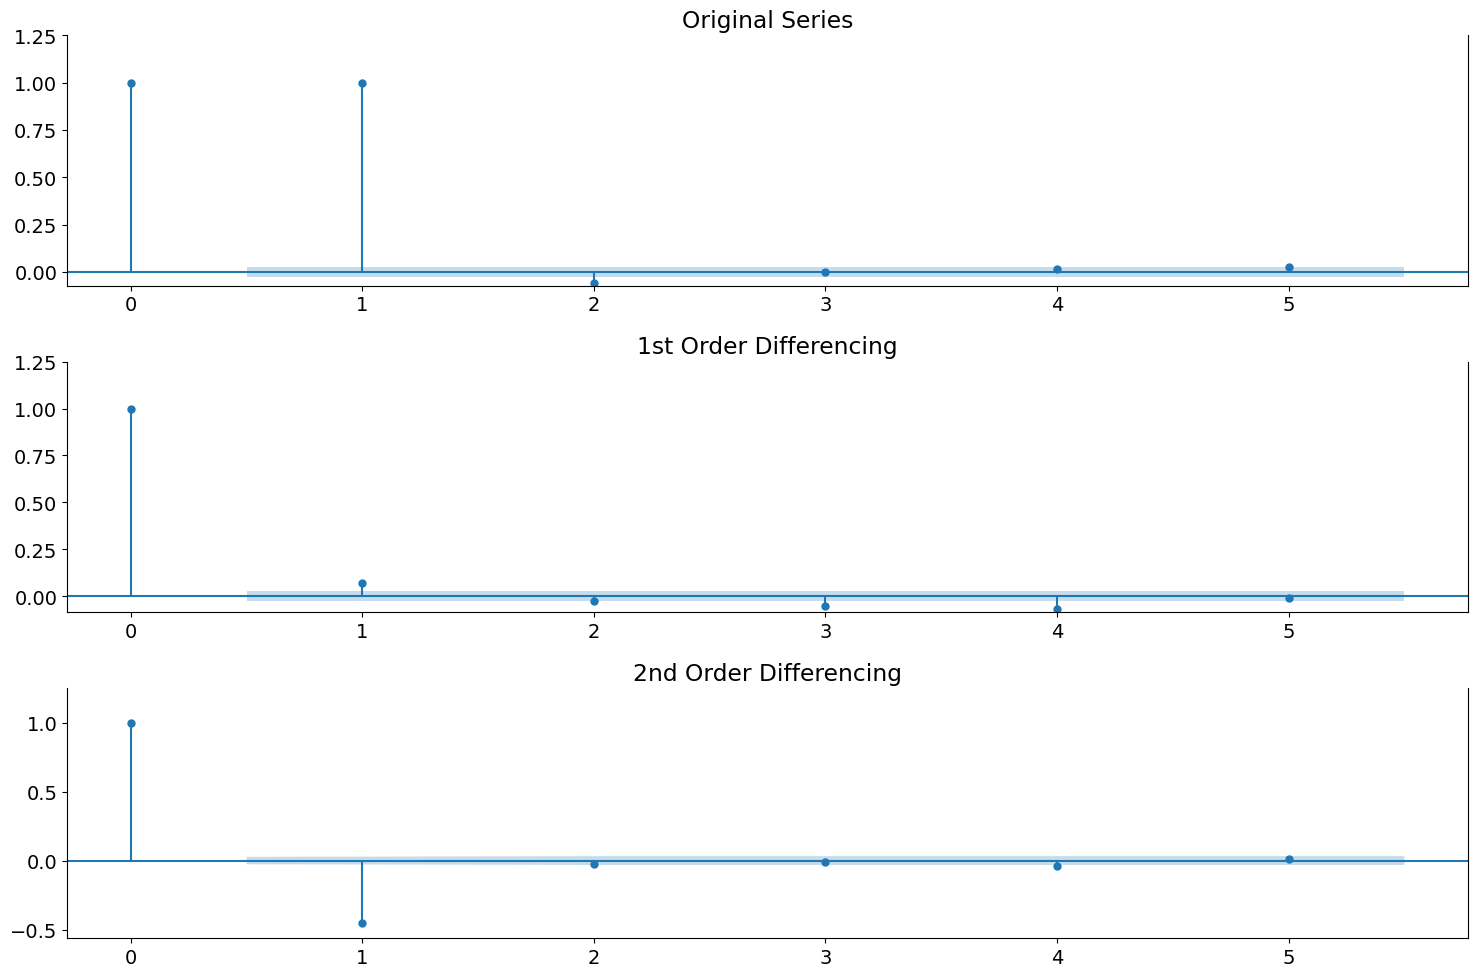

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15, 10))
plot_pacf(df.High, auto_ylims=True, lags = 5, ax=ax1, title = 'Original Series')
ax1.spines['top'].set_visible(False)

plot_pacf(df.High.diff().dropna(),auto_ylims=True, lags =5, ax=ax2,title = '1st Order Differencing')
ax2.spines['top'].set_visible(False)

plot_acf(df.High.diff().diff().dropna(), auto_ylims=True, lags =5, ax=ax3, title= '2nd Order Differencing')
ax3.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()


In [ ]:
train = df[df.index.year<2020]
test = df[df.index.year>=2020]

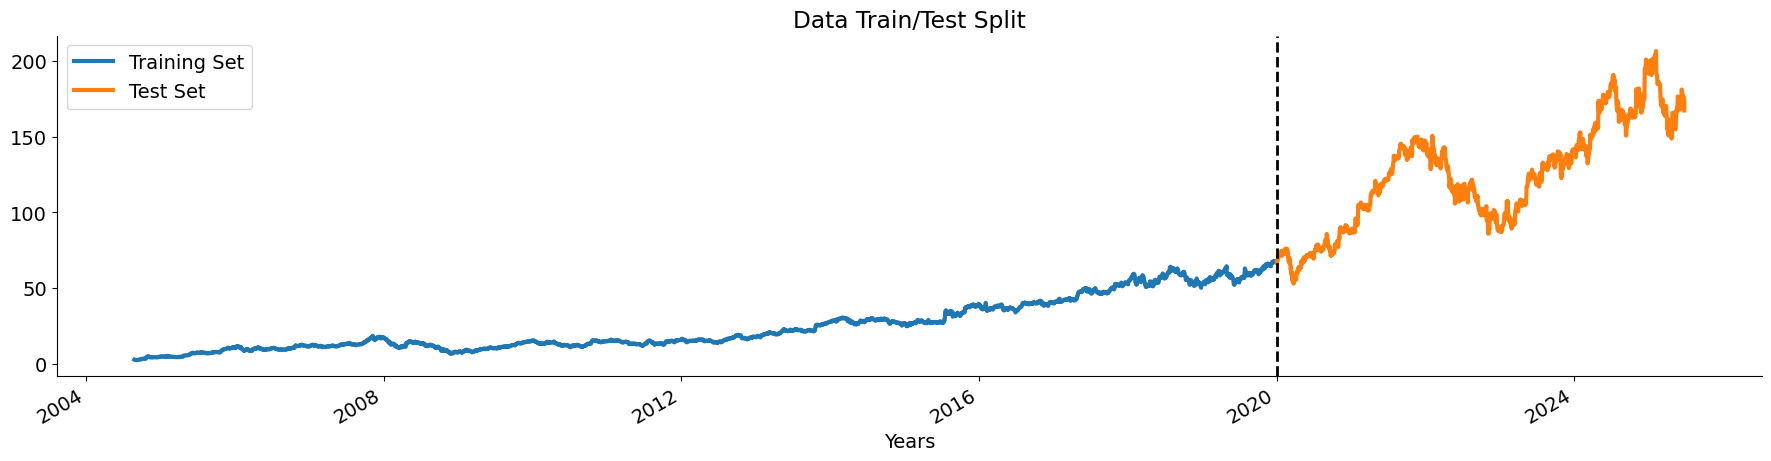

In [ ]:
fig, ax = plt.subplots()

train['High'].plot(ax=ax, label='Training Set', title='Data Train/Test Split', linewidth=3)

test['High'].plot(ax=ax, label='Test Set',  linewidth=3)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False);

ax.axvline('2020-01-01', color='black', ls='--', lw=2)

ax.legend(['Training Set', 'Test Set'])

ax.set_xlabel('Years')

plt.show()

In [ ]:
print(f'There are {train.shape[0]} rows in the training set and {test.shape[0]} rows in the test set')

There are 3865 rows in the training set and 1376 rows in the test set


In [ ]:
exogenous_features = ['Open', 'High', 'Low']
train = train[train.columns[:4]]
test = test[test.columns[:4]]

In [ ]:
train.head()

,Open,High,Low,Close
Date,,,,
2004-08-25 00:00:00-04:00,2.767188,2.776144,2.576391,2.608729
2004-08-26 00:00:00-04:00,2.610968,2.686591,2.584103,2.636839
2004-08-27 00:00:00-04:00,2.610719,2.685346,2.603505,2.684351
2004-08-30 00:00:00-04:00,2.689078,2.702013,2.629127,2.640570
2004-08-31 00:00:00-04:00,2.618928,2.624152,2.537584,2.537584


In [ ]:
import warnings
warnings.filterwarnings('ignore')
model = sm.tsa.arima.ARIMA(endog=train['Close'], exog=train[exogenous_features], order=(1, 1, 1))          #(p,d,q)
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 3865
Model:                 ARIMA(1, 1, 1)   Log Likelihood                1791.556
Date:                Wed, 25 Jun 2025   AIC                          -3571.112
Time:                        04:53:07   BIC                          -3533.555
Sample:                             0   HQIC                         -3557.776
                               - 3865                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Open          -0.5634      0.006    -96.383      0.000      -0.575      -0.552
High           0.7788      0.005    150.388      0.000       0.769       0.789
Low            0.7851      0.005    166.377      0.000       0.776       0.794
ar.L1         -0.0591      0.008     -6.953      0.000      -0.076      -0.042
ma.L1         -0.9997      0.003   -339.802      0.000      -1.006      -0.994
sigma2         0.0231      0.000     89.853      0.000       0.023       0.024
===================================================================================
Ljung-Box (L1) (Q):                   0.61   Jarque-Bera (JB):              9480.89
Prob(Q):                              0.44   Prob(JB):                         0.00
Heteroskedasticity (H):               8.22   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train['Predictions'] = model_fit.predict()

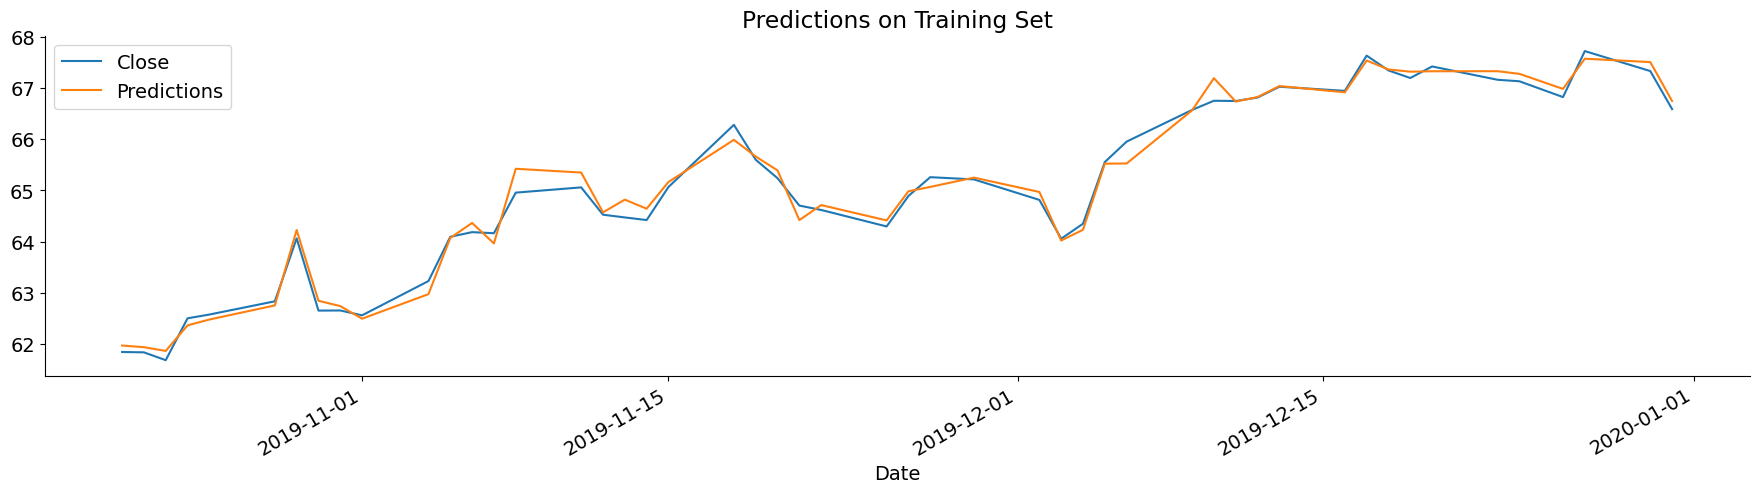

In [ ]:
train['Predictions'] = model_fit.predict()
train[['Close', 'Predictions']][-50:].plot()
plt.title('Predictions on Training Set')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

In [ ]:
forecast = [model_fit.forecast(exog=test[exogenous_features].iloc[i]).values[0] for i in range(len(test))]
test['Forecast'] = forecast

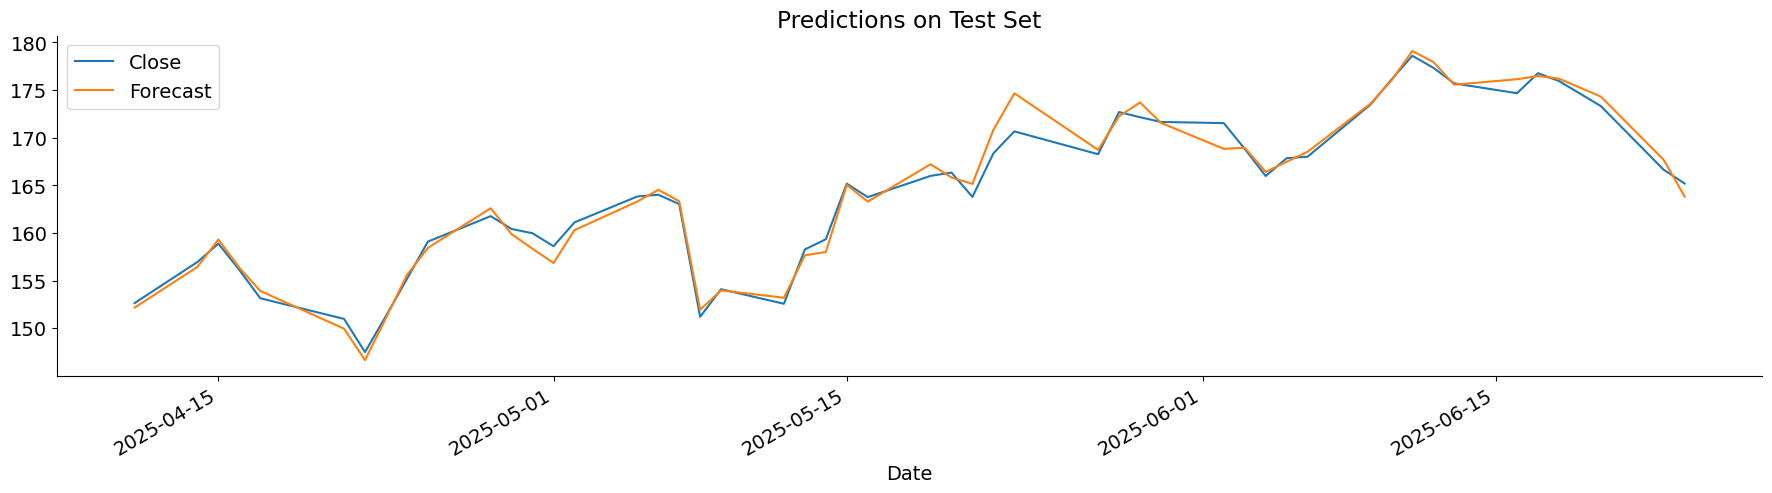

In [ ]:
test[['Close','Forecast']][-50:].plot()
plt.title('Predictions on Test Set')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Close'],test['Forecast']))
print(f'The RMSE for Multivariate ARIMAX is {round(rmse,4)}')

The RMSE for Multivariate ARIMAX is 0.8249


In [ ]:
test

,Open,High,Low,Close,Forecast
Date,,,,,
2020-01-02 00:00:00-05:00,66.391332,66.633380,66.209424,66.570259,66.475256
2020-01-03 00:00:00-05:00,67.018569,68.026024,66.923141,68.026024,67.766725
2020-01-06 00:00:00-05:00,66.998201,68.278024,66.964400,67.670166,68.006838
2020-01-07 00:00:00-05:00,67.178606,69.499192,67.147300,69.473846,68.999780
2020-01-08 00:00:00-05:00,69.605560,69.756654,69.163213,69.339653,69.415607
...,...,...,...,...,...
2025-06-17 00:00:00-04:00,174.729996,176.940002,174.649994,176.770004,176.474169
2025-06-18 00:00:00-04:00,175.699997,177.360001,174.580002,175.949997,176.199819
2025-06-20 00:00:00-04:00,176.009995,176.559998,173.199997,173.320007,174.318774


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, GRU
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error as mse

In [ ]:
df


,Open,High,Low,Close,Volume,Target,weekly_mean,quarterly_mean,annual_mean,annual_weekly_mean,annual_quarterly_mean,weekly_trend,open_close_ratio,high_close_ratio,low_close_ratio
Date,,,,,,,,,,,,,,,
2004-08-25 00:00:00-04:00,2.767188,2.776144,2.576391,2.608729,304946748.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.060742,1.064175,0.987604
2004-08-26 00:00:00-04:00,2.610968,2.686591,2.584103,2.636839,183772044.0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.990189,1.018868,0.980000
2004-08-27 00:00:00-04:00,2.610719,2.685346,2.603505,2.684351,141897960.0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.972570,1.000371,0.969882
2004-08-30 00:00:00-04:00,2.689078,2.702013,2.629127,2.640570,124235640.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.018370,1.023269,0.995667
2004-08-31 00:00:00-04:00,2.618928,2.624152,2.537584,2.537584,103935960.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.032056,1.034114,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-17 00:00:00-04:00,174.729996,176.940002,174.649994,176.770004,27389200.0,1,0.996169,0.940117,0.938216,0.941824,0.997979,0.571429,0.988460,1.000962,0.988007
2025-06-18 00:00:00-04:00,175.699997,177.360001,174.580002,175.949997,24973000.0,0,1.002825,0.943538,0.943190,0.940533,0.999631,0.571429,0.998579,1.008014,0.992214
2025-06-20 00:00:00-04:00,176.009995,176.559998,173.199997,173.320007,28707500.0,0,1.015759,0.957113,0.958059,0.943195,1.000988,0.428571,1.015520,1.018694,0.999308


In [ ]:
predictors  = ['Open', 'High','Low','Close','weekly_mean','quarterly_mean','annual_mean',
 'annual_weekly_mean','annual_quarterly_mean','weekly_trend','open_close_ratio','high_close_ratio','low_close_ratio']

In [ ]:
NN_df = df[predictors]

In [ ]:
NN_df.head()

,Open,High,Low,Close,weekly_mean,quarterly_mean,annual_mean,annual_weekly_mean,annual_quarterly_mean,weekly_trend,open_close_ratio,high_close_ratio,low_close_ratio
Date,,,,,,,,,,,,,
2004-08-25 00:00:00-04:00,2.767188,2.776144,2.576391,2.608729,0.0,0.0,0.0,0.0,0.0,0.0,1.060742,1.064175,0.987604
2004-08-26 00:00:00-04:00,2.610968,2.686591,2.584103,2.636839,0.0,0.0,0.0,0.0,0.0,0.0,0.990189,1.018868,0.980000
2004-08-27 00:00:00-04:00,2.610719,2.685346,2.603505,2.684351,0.0,0.0,0.0,0.0,0.0,0.0,0.972570,1.000371,0.969882
2004-08-30 00:00:00-04:00,2.689078,2.702013,2.629127,2.640570,0.0,0.0,0.0,0.0,0.0,0.0,1.018370,1.023269,0.995667
2004-08-31 00:00:00-04:00,2.618928,2.624152,2.537584,2.537584,0.0,0.0,0.0,0.0,0.0,0.0,1.032056,1.034114,1.000000


In [ ]:
scaler = MinMaxScaler()

scaler.fit(NN_df[NN_df.columns])

NN_df[NN_df.columns] = scaler.transform(NN_df[NN_df.columns])

In [ ]:
NN_df

,Open,High,Low,Close,weekly_mean,quarterly_mean,annual_mean,annual_weekly_mean,annual_quarterly_mean,weekly_trend,open_close_ratio,high_close_ratio,low_close_ratio
Date,,,,,,,,,,,,,
2004-08-25 00:00:00-04:00,0.001495,0.001202,0.000576,0.000594,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.788954,0.575175,0.899585
2004-08-26 00:00:00-04:00,0.000716,0.000763,0.000615,0.000733,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.419786,0.169106,0.837990
2004-08-27 00:00:00-04:00,0.000715,0.000757,0.000712,0.000966,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.327595,0.003323,0.756032
2004-08-30 00:00:00-04:00,0.001106,0.000839,0.000840,0.000751,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.567245,0.208552,0.964899
2004-08-31 00:00:00-04:00,0.000756,0.000457,0.000382,0.000245,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.638854,0.305753,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-17 00:00:00-04:00,0.859409,0.854817,0.861502,0.856821,0.880249,0.588939,0.460937,0.493442,0.652464,0.571429,0.410738,0.008619,0.902850
2025-06-18 00:00:00-04:00,0.864249,0.856876,0.861151,0.852790,0.886131,0.591083,0.463381,0.492765,0.653544,0.571429,0.463689,0.071823,0.936927
2025-06-20 00:00:00-04:00,0.865795,0.852955,0.854247,0.839860,0.897560,0.599587,0.470686,0.494160,0.654432,0.428571,0.552333,0.167544,0.994391


In [ ]:
import numpy as np

def df_to_X_y2(df, window_size=13):
    """
    Converts a DataFrame into windowed sequences (X) and corresponding labels (y).

    Parameters:
        df (pd.DataFrame): The input DataFrame. First column is assumed to contain the label.
        window_size (int): Number of time steps per input sequence.

    Returns:
        X (np.ndarray): Feature sequences of shape (samples, window_size, features).
        y (np.ndarray): Corresponding labels of shape (samples,).
    """
    df_as_np = df.to_numpy()
    X, y = [], []

    for i in range(len(df_as_np) - window_size):
        row = df_as_np[i:i+window_size]
        X.append(row)
        label = df_as_np[i + window_size][0]
        y.append(label)

    return np.array(X), np.array(y)


In [ ]:
X, y = df_to_X_y2(NN_df)

print(f'X shape {X.shape} y shape {y.shape}')
print(f'There are {X.shape[0]} samples, {X.shape[1]} timesteps and {X.shape[2]} features in the our data')

X shape (5228, 13, 13) y shape (5228,)
There are 5228 samples, 13 timesteps and 13 features in the our data


In [ ]:
y

array([0.00092333, 0.0010251 , 0.00141107, ..., 0.86579527, 0.85551805,
       0.81720294])

In [ ]:
y = np.squeeze(scaler.fit_transform(np.expand_dims(y, axis=1)))

In [ ]:
threshold = int(X.shape[0] * 0.75)

X_train, y_train = X[:threshold], y[:threshold]

X_test, y_test = X[threshold:], y[threshold:]

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3921, 13, 13)
y_train shape: (3921,)
X_test shape: (1307, 13, 13)
y_test shape: (1307,)


In [ ]:
model = Sequential()

model.add(InputLayer((X_train.shape[1], X_train.shape[2])))

model.add(GRU(64))

model.add(Dense(8, 'relu'))

model.add(Dense(1, 'linear'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 64)             │        15,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,697 (61.32 KB)

 Trainable params: 15,697 (61.32 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
callback = EarlyStopping(

    monitor="val_loss",

    min_delta=0.001,

    patience=5,

    verbose=1,

    mode="auto",

    baseline=None,

    restore_best_weights=False
)

In [ ]:
model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, callbacks=callback)

Epoch 1/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0066 - root_mean_squared_error: 0.0737 - val_loss: 2.8310e-04 - val_root_mean_squared_error: 0.0168
Epoch 2/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 2.3288e-05 - root_mean_squared_error: 0.0048 - val_loss: 4.4538e-04 - val_root_mean_squared_error: 0.0211
Epoch 3/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.7847e-05 - root_mean_squared_error: 0.0042 - val_loss: 3.2613e-04 - val_root_mean_squared_error: 0.0181
Epoch 4/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.2756e-05 - root_mean_squared_error: 0.0036 - val_loss: 3.3435e-04 - val_root_mean_squared_error: 0.0183
Epoch 5/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.0567e-05 - root_mean_squared_error: 0.0032 - val_loss: 2.6742e-04 - val_root_mean_squared_error: 0.0164
Epoch 6/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.9257e-06 - root_mean_squared_error: 0.0030 - val_loss: 2.4818e-04 - val_root_mean_squared_error: 0.0158

In [ ]:
test_predictions = model.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})
test_results

41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


,Test Predictions,Actuals
0,0.280034,0.289094
1,0.283068,0.284954
2,0.285270,0.294502
3,0.293791,0.296125
4,0.296659,0.301245
...,...,...
1302,0.846411,0.859279
1303,0.841633,0.864123
1304,0.840526,0.865671
1305,0.832809,0.855385


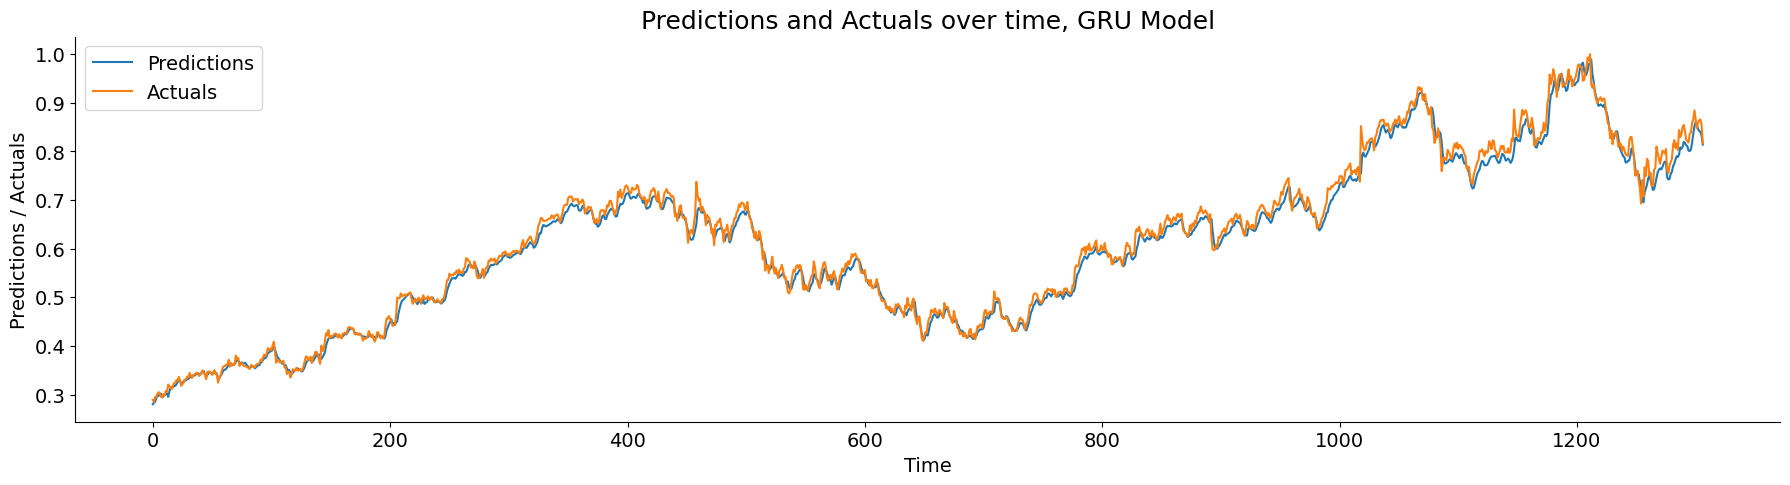

In [ ]:
plt.plot(test_results['Test Predictions'])
plt.plot(test_results['Actuals'])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(['Predictions', 'Actuals'])
plt.ylabel('Predictions / Actuals')
plt.xlabel('Time')
plt.title('Predictions and Actuals over time, GRU Model', fontsize=18)
plt.show()

In [ ]:
print('MSE of the GRU model :', round(mse(test_results['Test Predictions'], test_results['Actuals']),6))

MSE of the GRU model : 0.000248
